In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import LearningCurve
from imblearn.pipeline import Pipeline as imbpipeline

import warnings
warnings.filterwarnings('ignore')

# 1 Data Preparation

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2 Exploratory Data Analysis
## 2.1 Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 2.2 HeatMap

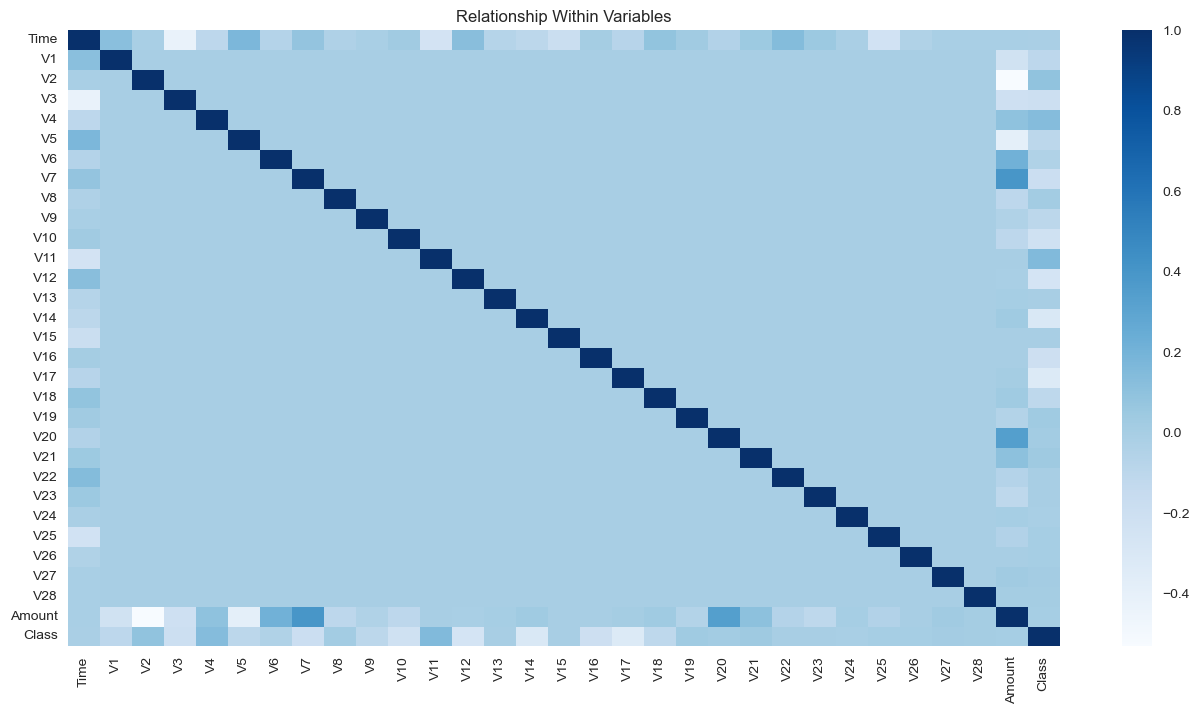

In [6]:
plt.figure(figsize=(16,8))
corr = df.corr()

sns.heatmap(corr, cmap='Blues')
plt.title('Relationship Within Variables')
plt.savefig('heatmap.png')
plt.show()

## 2.3 Data Distribution

In [7]:
pd.DataFrame(df['Class'].value_counts())

,Class
0,284315
1,492


In [8]:
print('Fraud proportion takes up {}%'.format(round(df['Class'].value_counts().values[1]/len(df['Class']) * 100, 4)))

Fraud proportion takes up 0.1727%


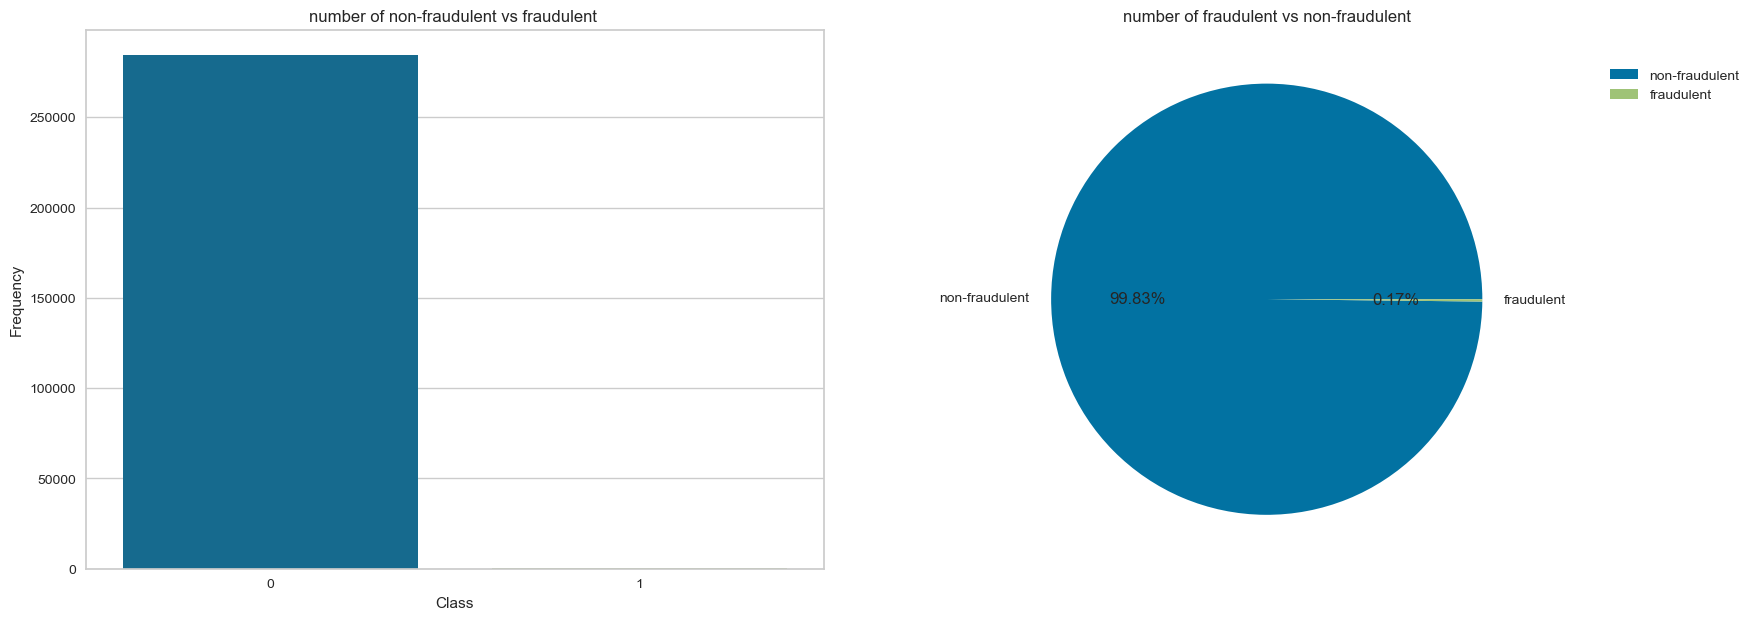

In [9]:
fig = plt.figure(figsize=(20,7))    # changes the output plotting size
fig.subplots_adjust(wspace=0.1, hspace=0.1)    # increases the distance between subplots

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Class', data = df)
ax1.set_title('number of non-fraudulent vs fraudulent ')
ax1.set_xlabel('Class')
ax1.set_ylabel('Frequency')

ax2 = fig.add_subplot(122)
class_lst = df['Class'].value_counts().values.tolist()
class_name = ['non-fraudulent', 'fraudulent']
ax2.pie(class_lst, labels = class_name, autopct='%1.2f%%')
ax2.set_title('number of fraudulent vs non-fraudulent')
plt.legend(class_name, loc = 'upper right', bbox_to_anchor=(1.4, 0.95))
plt.show()

Based on the above outputs and graphs, there are 284315 of 0's and 492 of 1's, and fraud cases (1's) proportion only takes up 0.17%. It means that our dataset is highly imbalanced. 

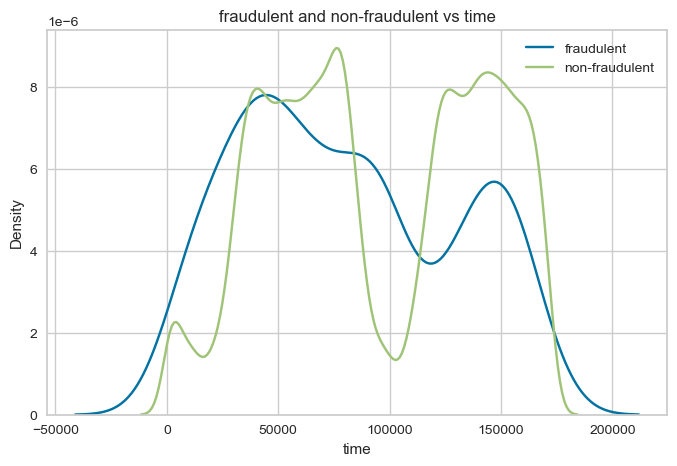

In [10]:
data_fraud = df[df['Class'] == 1] # creating fraudulent dataframe
data_non_fraud = df[df['Class'] == 0] # creating non-fraudulent dataframe

# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non-fraudulent', hist=False)

ax.set_title('fraudulent and non-fraudulent vs time')
ax.set_xlabel('time')
plt.legend()
plt.show()

From the 'fraudulent and fraudulent vs time' plot, it shows that there is no specific pattern for the fraudulent and non-fraudulent transctions with respect to time. Therefore, the 'Time' variable can be dropped from the dataset. 

In [11]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

# 3. Supervised Learning 
## 3.1 Data Splitting

In [12]:
X = df.drop('Class', axis = 1)
y = df.Class

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68806,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,-0.816909,...,-0.644896,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,12.95
40018,1.228473,-0.138826,0.473795,-0.166381,-0.453564,-0.190135,-0.355309,0.048598,0.128943,-0.014495,...,0.032481,-0.172147,-0.574730,0.036834,-0.303782,0.073315,0.810356,-0.069178,0.001890,25.57
250360,1.926148,-0.198628,-0.286727,1.596852,-0.488963,-0.311405,-0.303207,0.035513,1.301312,0.007083,...,-0.355216,-0.528432,-1.251300,0.455607,-0.120530,-0.361515,-1.099295,0.052747,-0.032622,6.90
234820,2.046232,0.196183,-1.704650,0.530027,0.177496,-1.443091,0.255403,-0.365759,0.602945,-0.478188,...,-0.216247,0.201104,0.757245,-0.013600,-0.079318,0.234805,-0.098151,0.000028,-0.031675,4.55
10001,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,0.889521,...,-0.134542,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,3.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


## 3.2 Data Distribution

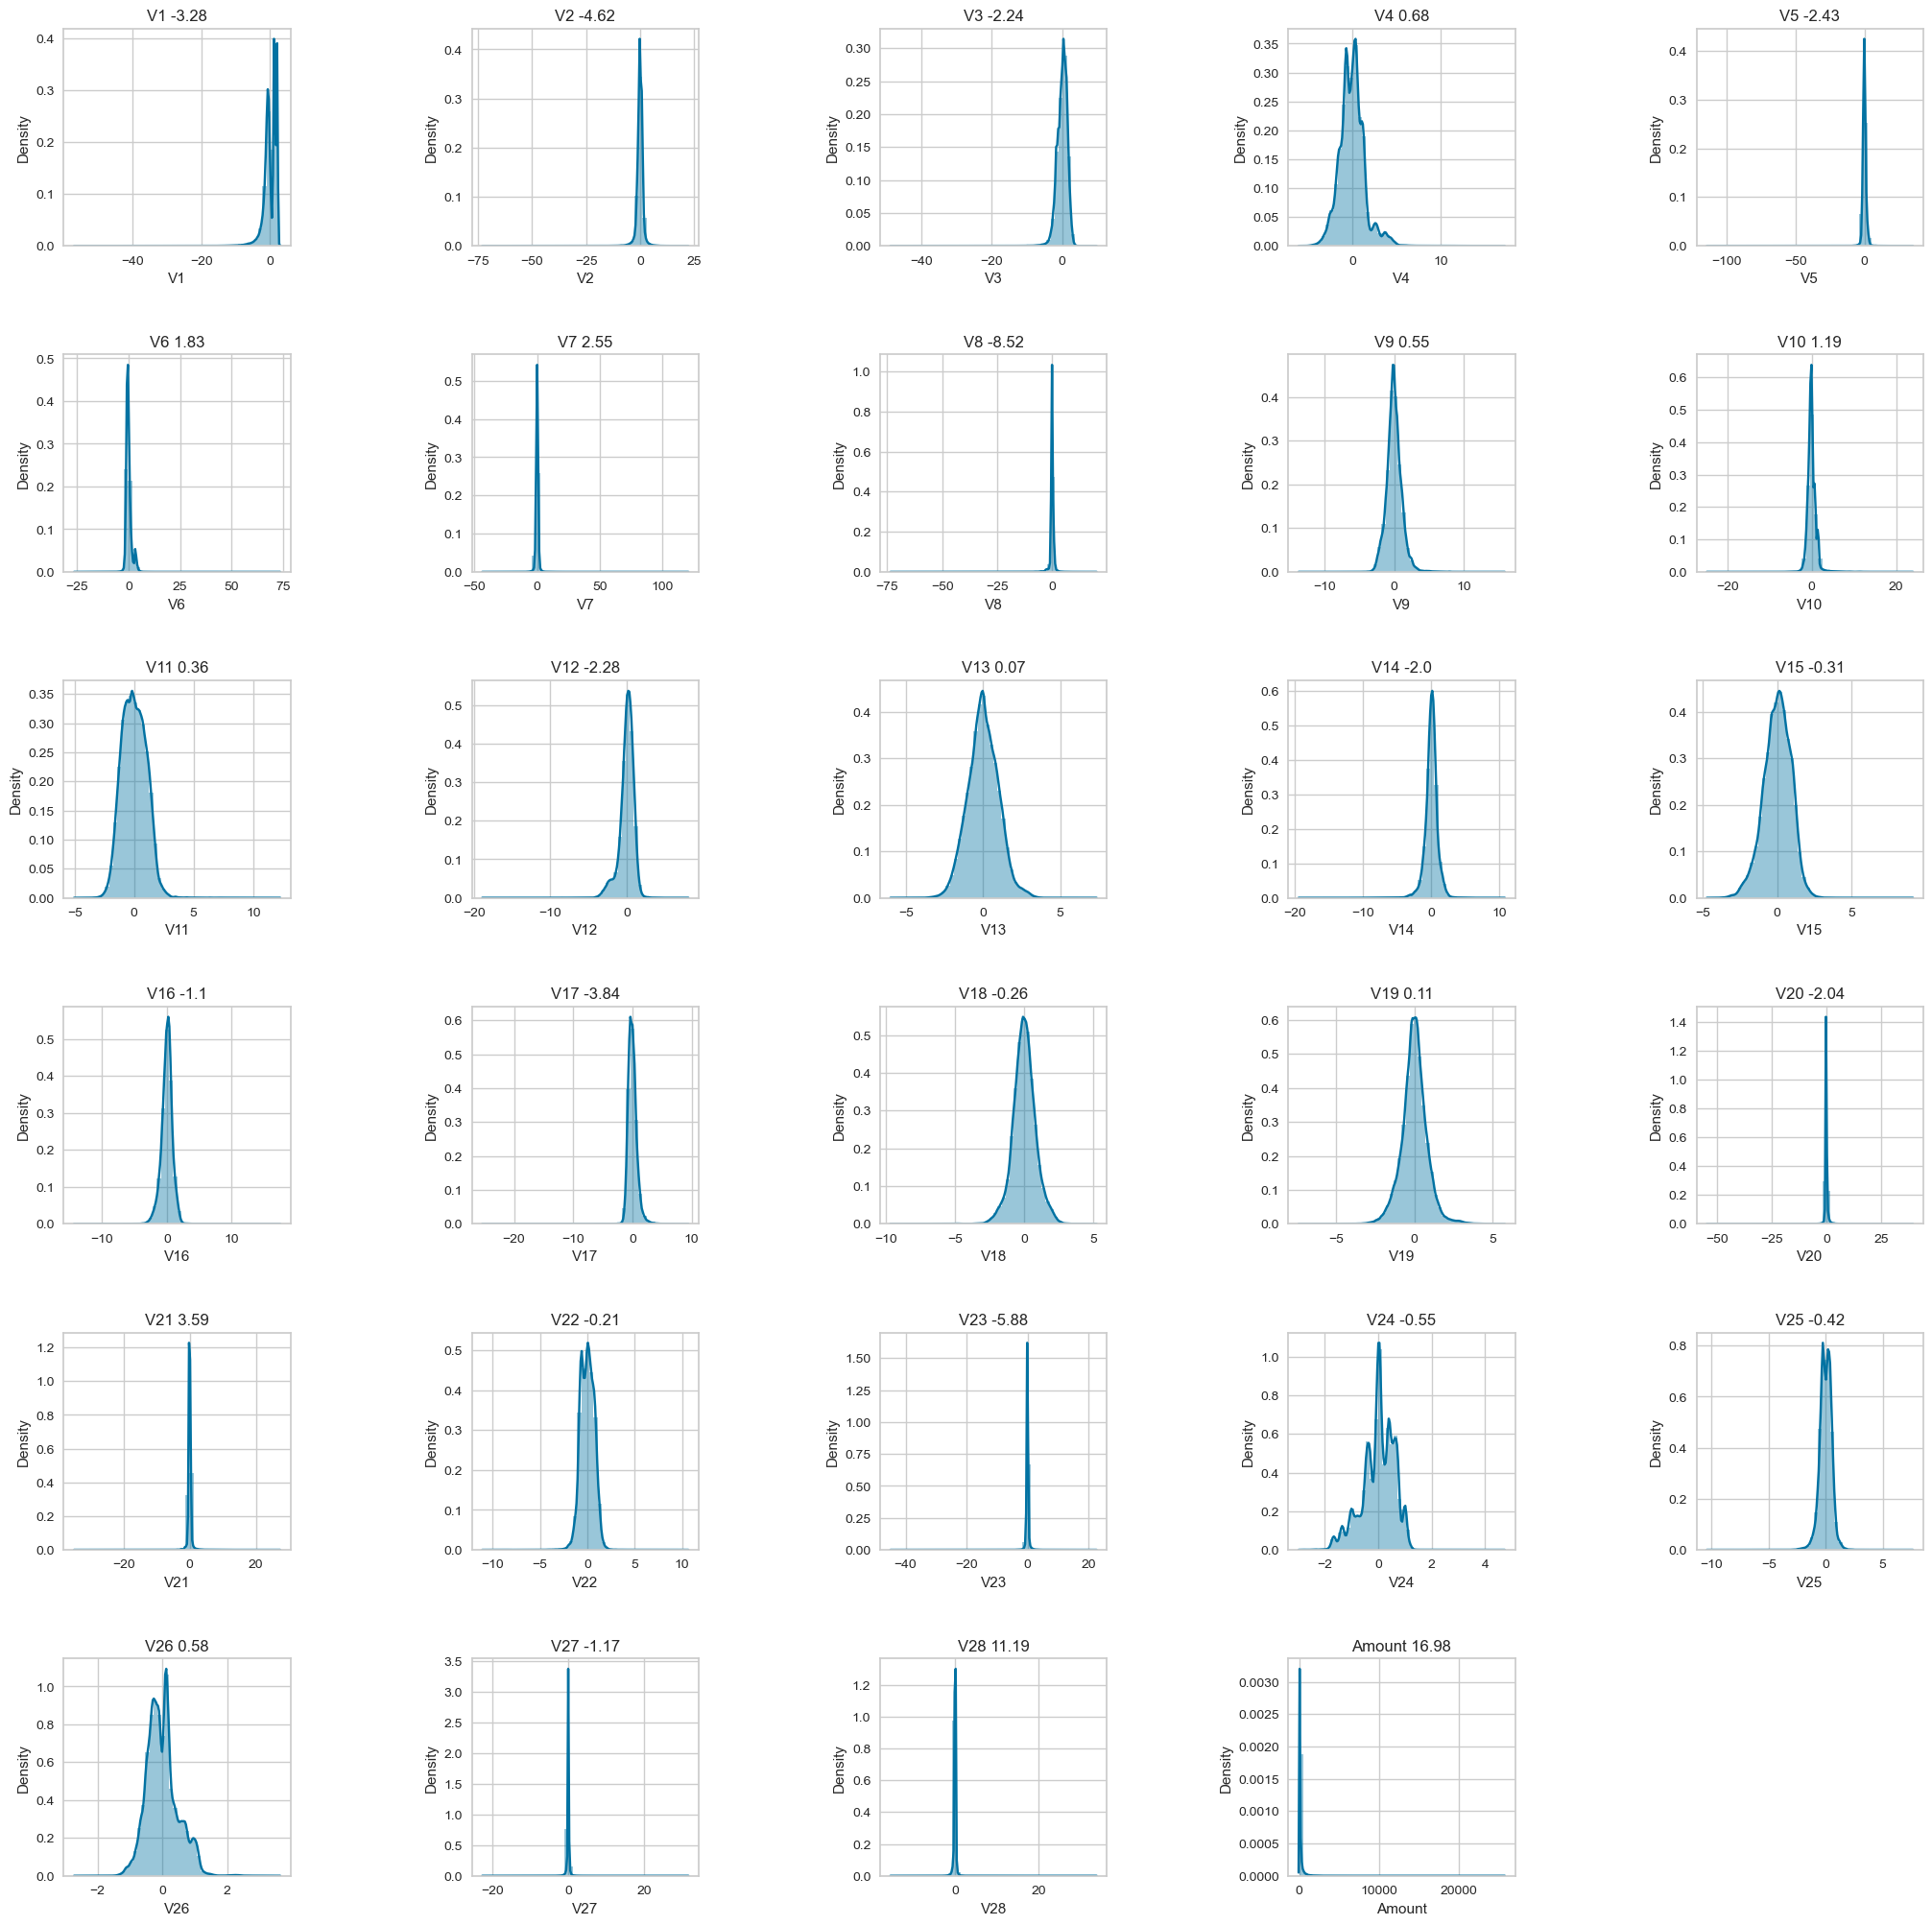

In [14]:
# Plotting the distribution of the variables (skewness) of all the columns
fig = plt.figure(figsize=(25,25))   
fig.subplots_adjust(wspace=0.8, hspace=0.5)   

k=0
for col in X.columns :    
    k=k+1
    plt.subplot(6, 5, k)    
    sns.distplot(X[col])
    plt.title(col+' '+str(round(X[col].skew(), 2)))

plt.show()


## 3.3 Data Standardization

In [15]:
def standardization(df, name):
    new_name = name+'_stand'
    df[new_name]= (df[name] - df[name].mean()) / df[name].std()
    
    return df

# Standardize the X_train dataset
features_lst = X.columns
for i in features_lst:
    standardization(X_train, i)

In [16]:
def standardize_test(x_train, x_test, name):
    new_name = name+'_stand'
    x_test[new_name]= (x_test[name] - x_train[name].mean()) / x_train[name].std()
    
    return x_test

# Standardize the X_test dataset
for j in features_lst:
    standardize_test(X_train, X_test, j)

## 3.4 Data Distribution after Standardization

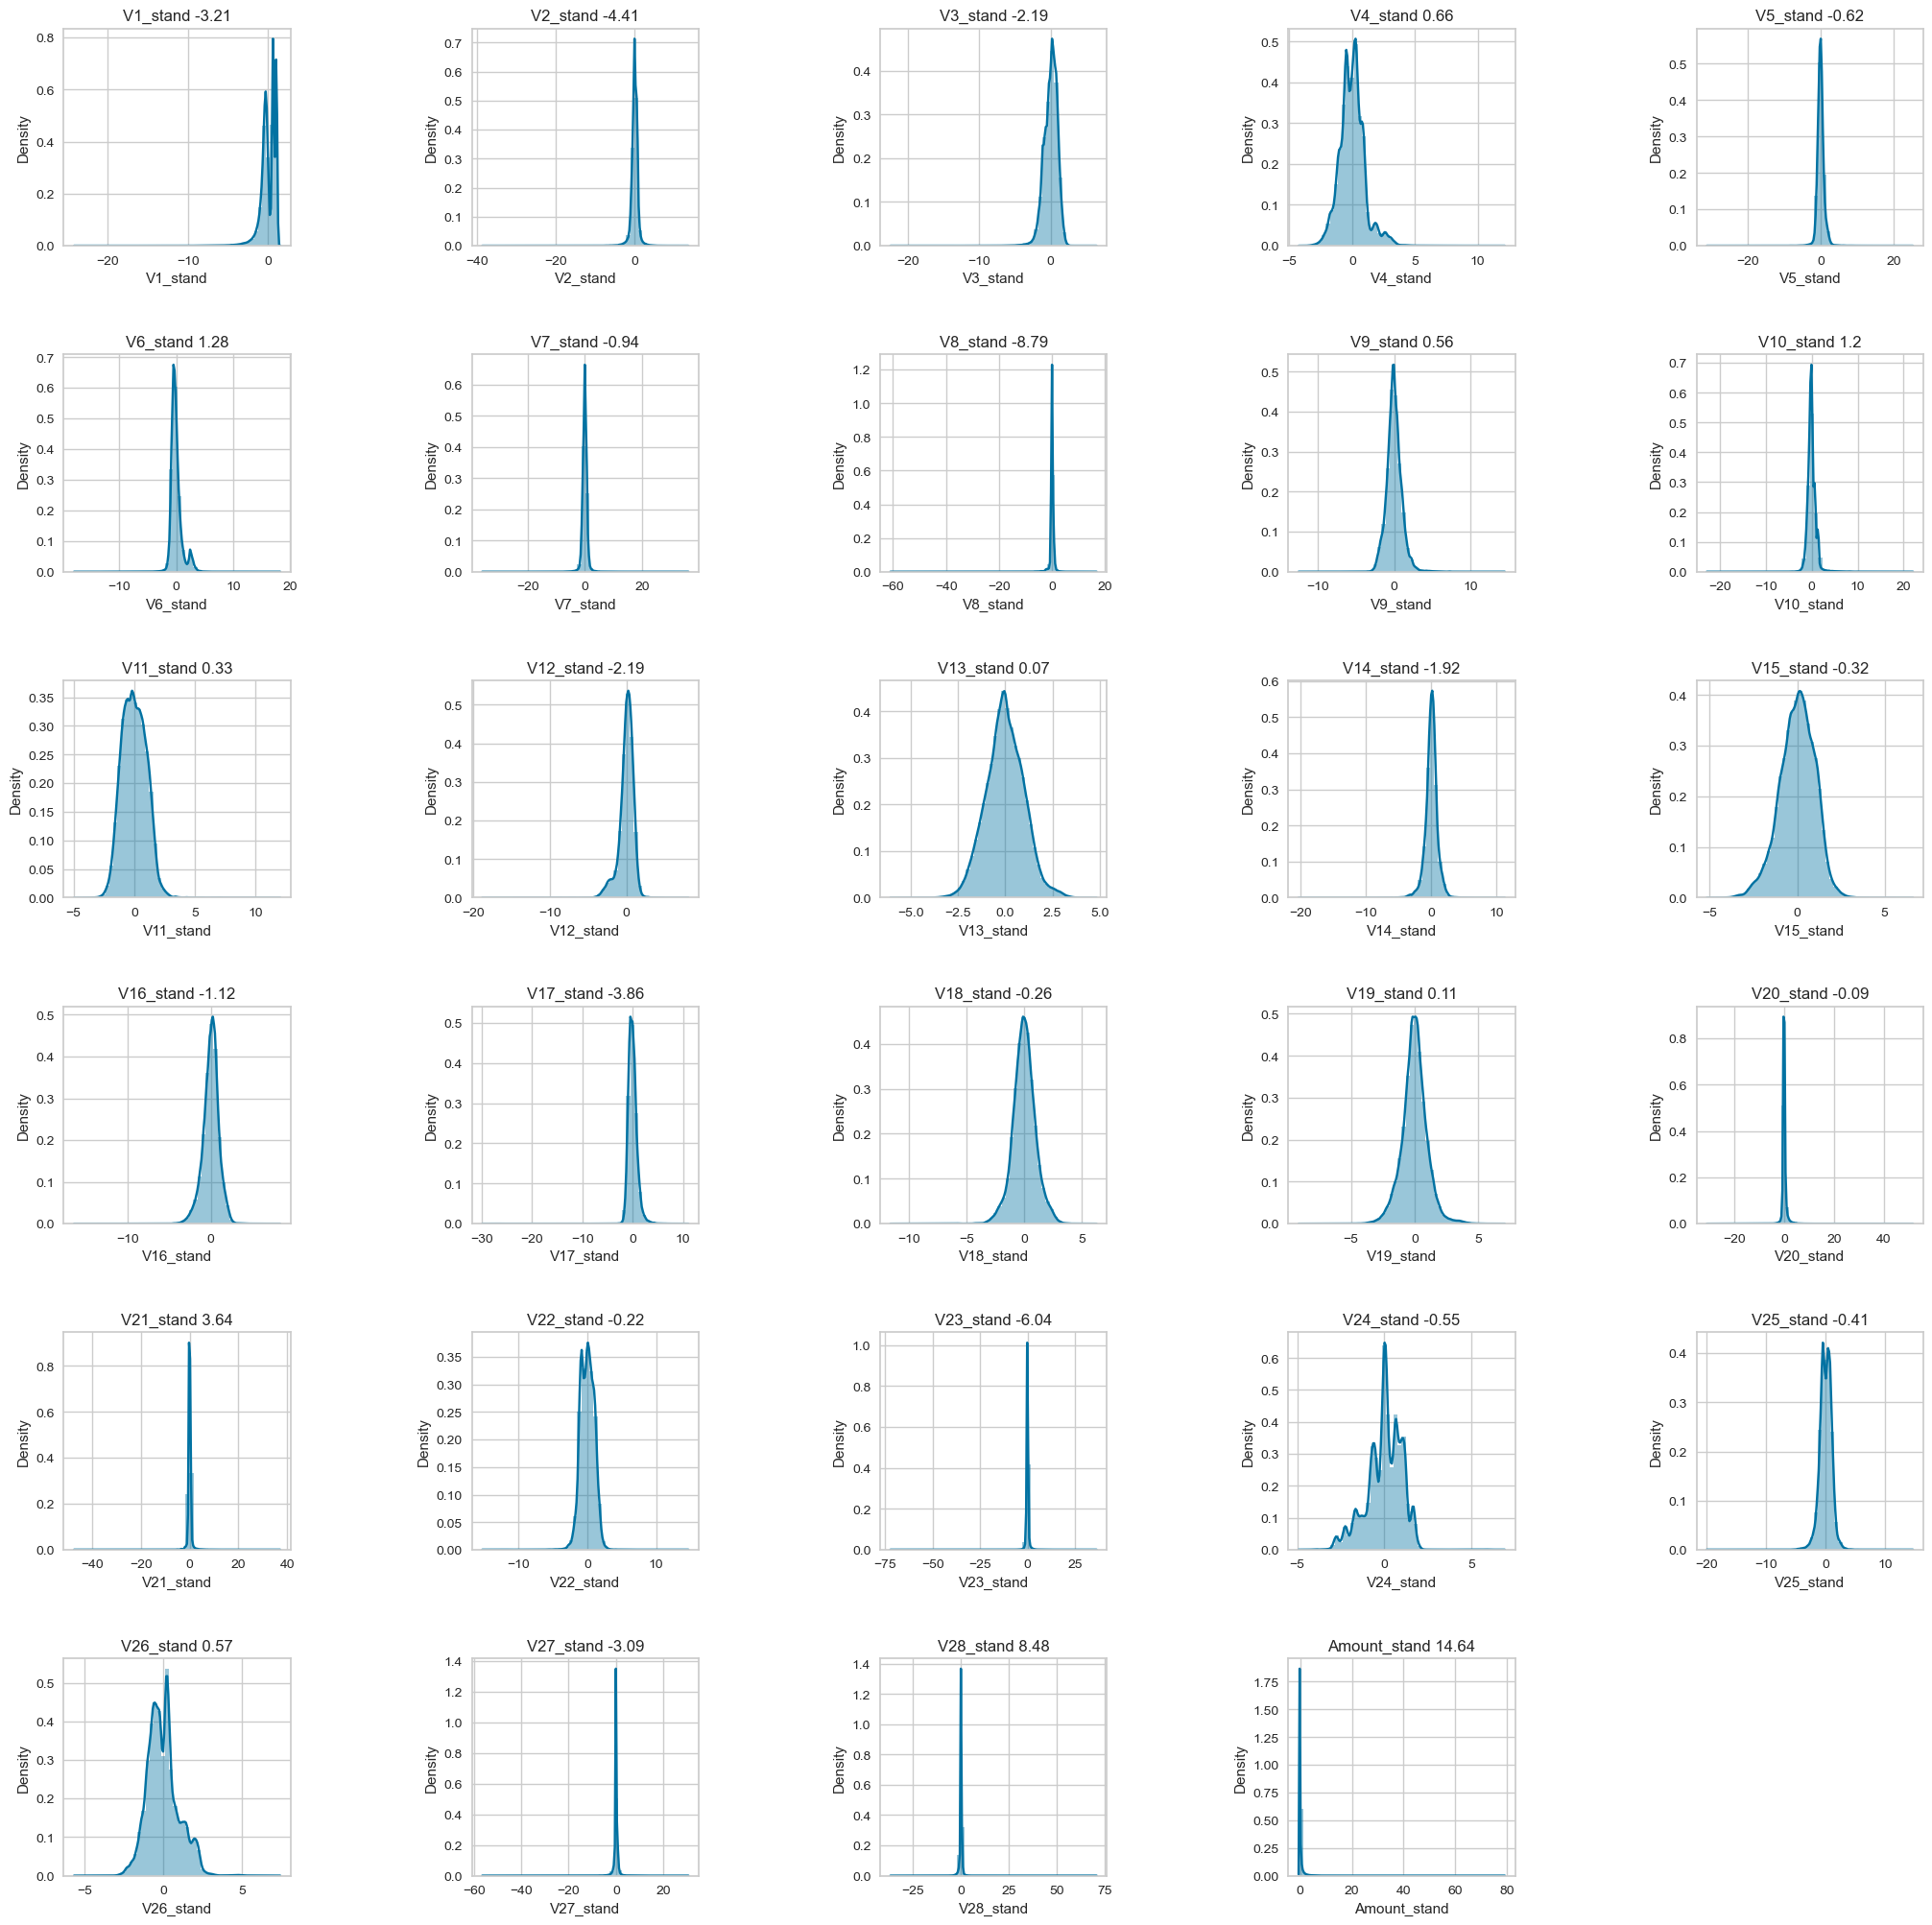

In [17]:
# Plotting the distribution of the variables (skewness) of all the columns after standardization
fig = plt.figure(figsize=(25,25))   
fig.subplots_adjust(wspace=0.8, hspace=0.5)

k=0
for col in [i+'_stand' for i in X.columns]: 
    k=k+1
    plt.subplot(6, 5, k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(round(X_train[col].skew(), 2)))

plt.show()

## 3.5 Prediction Model Construction
In this section, we are going to use supervised learning methods including Logistic Regression, KNN, Random Forest, and GradientBoostingClassifier (GBDT) algorithm to construct prediction models. Confusion matrix, accuracy, recall, precision, Matthews Correlation Coefficient (MCC), AUC-ROC curve, and learning curve would be used to evaluate models. GridSearchCV will be used for tunning hyperparameters. Smote oversampling methods will be not only used to handle with the imbalanced dataset but also research whether the predition model can be improved by smote.

In [18]:
no_stand_X_features = X.columns
stand_X_features = [i+'_stand' for i in X.columns]

### 3.5.1 Confusion Matrix and Matthews Correlation Coefficient (MCC)

In [19]:
def confusion_matrix_mcc(test_y, pred_y, file_name, model_name):
    print("Classification accuracy is: \n", metrics.confusion_matrix(test_y, pred_y, normalize='all'))
    cf_matrix = metrics.confusion_matrix(test_y, pred_y)
    print("Confusion Matrix is: \n", cf_matrix)
    print("Classification report is: \n", classification_report(test_y, pred_y))
    print("MCC:", metrics.matthews_corrcoef(test_y, pred_y))
    
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='Blues')
    plt.title(model_name)
    plt.xlabel("Predicated Label")
    plt.ylabel("True Label")
    plt.savefig('cf_images/' + file_name + '.png')
    plt.show()

### 3.5.2 AUC-ROC Curve

In [20]:
def ROC(Y_test, Y_pred, Y_pred_prob, file_name, model_name):
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    fprcat, tprcat, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
    AUC = metrics.auc(fprcat, tprcat)
    
    plt.figure(figsize=(3,2), dpi=200)
    plt.plot(fprcat, tprcat, 'b', label='AUC = %0.2f' % AUC)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(model_name, fontsize=6)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('FPR', fontsize=6)
    plt.ylabel('TPR', fontsize=6)
    plt.savefig('auc_images/' + file_name + '.png')
    plt.show()

### 3.5.3 Prediction Model 

In [21]:
def model_nosm(features, model, file_name, model_name):
    print(model_name+' and without using smote')
    model.fit(X_train[features], y_train)
    
    y_pred = model.predict(X_test[features])
    y_pred_proba = model.predict_proba(X_test[features])[:, 1] # Keep probabilities for the positive outcome only
    confusion_matrix_mcc(y_test, y_pred, file_name, model_name)
    
    print("Accuracy (R^2) of Train Dataset: ", model.score(X_train[features], y_train))
    print("Accuracy (R^2) of Test Dataset: ", model.score(X_test[features], y_test))
    print('Accuracy score overall: ', metrics.accuracy_score(y_test, y_pred))
    print('Precision score overall: ', metrics.precision_score(y_test, y_pred))
    print('Recall score is {}%'.format(round(metrics.recall_score(y_test, y_pred) * 100, 4)))
    return y_pred, y_pred_proba, model

In [22]:
def model_sm(features, model_classifier, file_name, model_name):  
    print('\n'+model_name+' and with using smote')
    smote_m = model_classifier
    sm = SMOTE(random_state = 0)
    X_sampled_smote, y_sampled_smote = sm.fit_resample(X_train[features], y_train)
    
    smote_m.fit(X_sampled_smote, y_sampled_smote)
    y_pred_smote = smote_m.predict(X_test[features])
    y_pred_proba_smote = smote_m.predict_proba(X_test[features])[:, 1]
    confusion_matrix_mcc(y_test, y_pred_smote, file_name, model_name)  

    print("Accuracy (R^2) of Train Dataset: ", smote_m.score(X_train[features], y_train))
    print("Accuracy (R^2) of Test Dataset: ", smote_m.score(X_test[features], y_test))
    print('Accuracy Score overall:', metrics.accuracy_score(y_test, y_pred_smote))
    print('Precision score overall: ', metrics.precision_score(y_test, y_pred_smote))
    print('Recall score is {}%'.format(round(metrics.recall_score(y_test, y_pred_smote) * 100, 4)))
    return y_pred_smote, y_pred_proba_smote, smote_m

## 3.6 Without Oversampling
### 3.6.1 Logistic Regression 

In [22]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state = 42)

Logistic Regression without standardization and without using smote
Classification accuracy is: 
 [[9.98068888e-01 1.58000070e-04]
 [6.49555844e-04 1.12355605e-03]]
Confusion Matrix is: 
 [[56852     9]
 [   37    64]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.7449763042763461


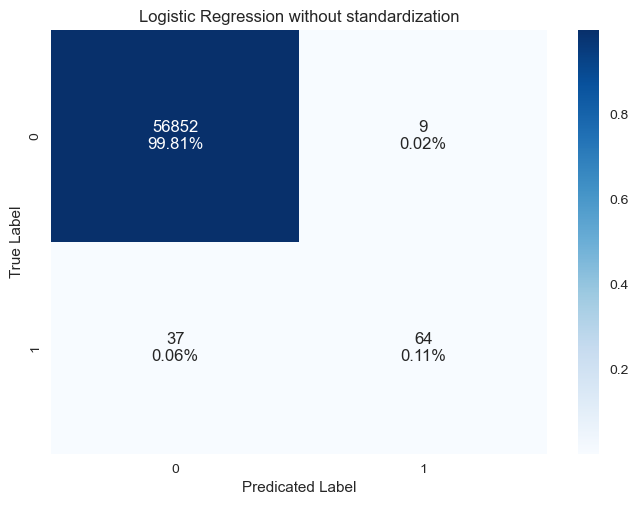

Accuracy (R^2) of Train Dataset:  0.999188044503939
Accuracy (R^2) of Test Dataset:  0.9991924440855307
Accuracy score overall:  0.9991924440855307
Precision score overall:  0.8767123287671232
Recall score is 63.3663%


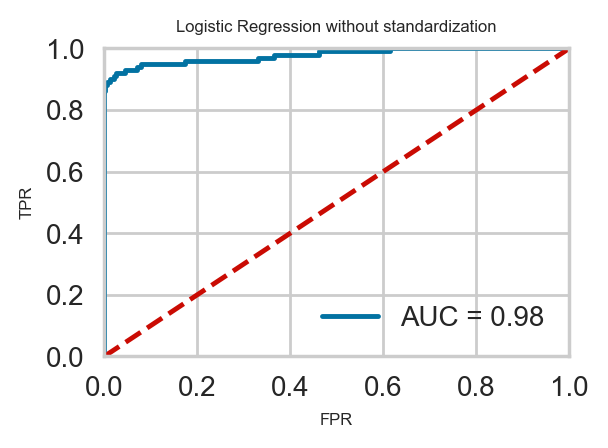

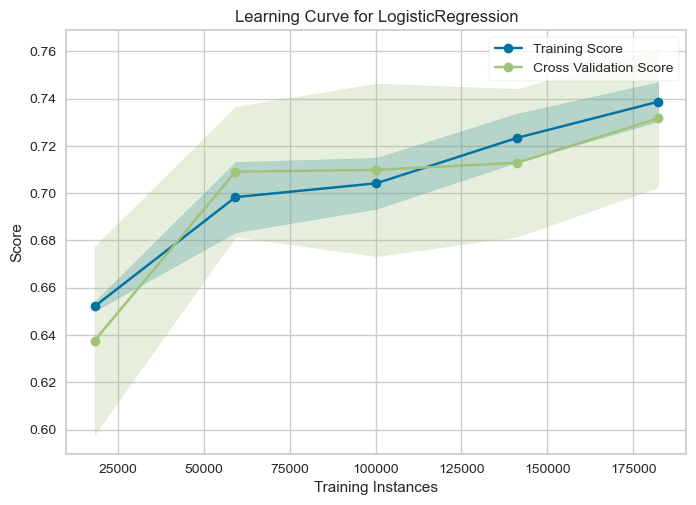

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [23]:
# Case 1: without standardization and without cv
y_pred, y_pred_proba, model = model_nosm(no_stand_X_features, lr, 'lr_nosd', 'Logistic Regression without standardization')
ROC(y_test, y_pred, y_pred_proba, 'lr_nosd', 'Logistic Regression without standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()     

Logistic Regression with standardization and without using smote
Classification accuracy is: 
 [[9.98068888e-01 1.58000070e-04]
 [6.49555844e-04 1.12355605e-03]]
Confusion Matrix is: 
 [[56852     9]
 [   37    64]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.7449763042763461


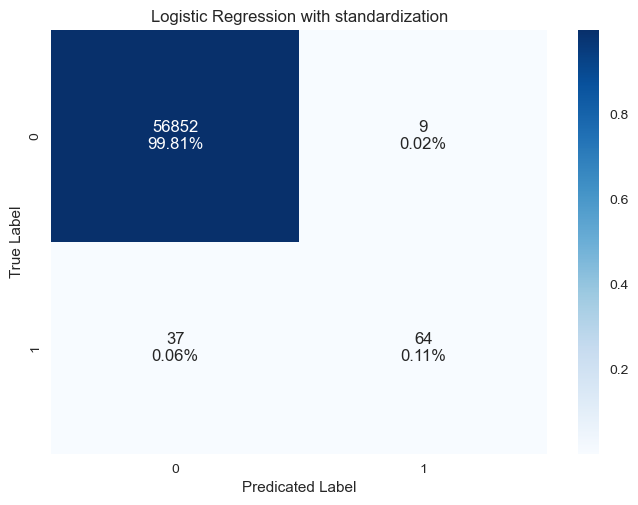

Accuracy (R^2) of Train Dataset:  0.999188044503939
Accuracy (R^2) of Test Dataset:  0.9991924440855307
Accuracy score overall:  0.9991924440855307
Precision score overall:  0.8767123287671232
Recall score is 63.3663%


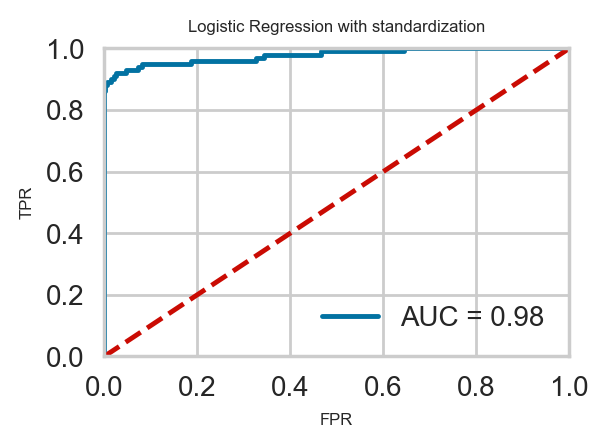

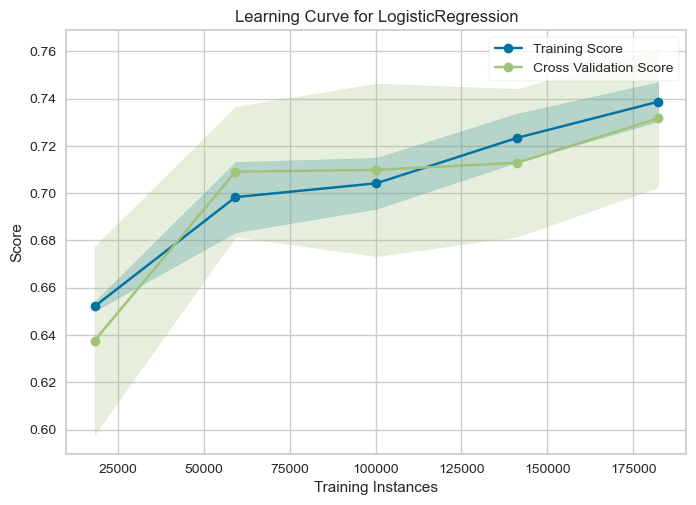

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [24]:
# Case 2: with standardization and without cv
y_pred, y_pred_proba, model = model_nosm(stand_X_features, lr, 'lr_sd', 'Logistic Regression with standardization')
ROC(y_test, y_pred, y_pred_proba, 'lr_sd', 'Logistic Regression with standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()    

### 3.6.2 KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)

KNN without standardization and without using smote
Classification accuracy is: 
 [[9.98103999e-01 1.22888944e-04]
 [5.44222464e-04 1.22888944e-03]]
Confusion Matrix is: 
 [[56854     7]
 [   31    70]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.91      0.69      0.79       101

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.7934566549493958


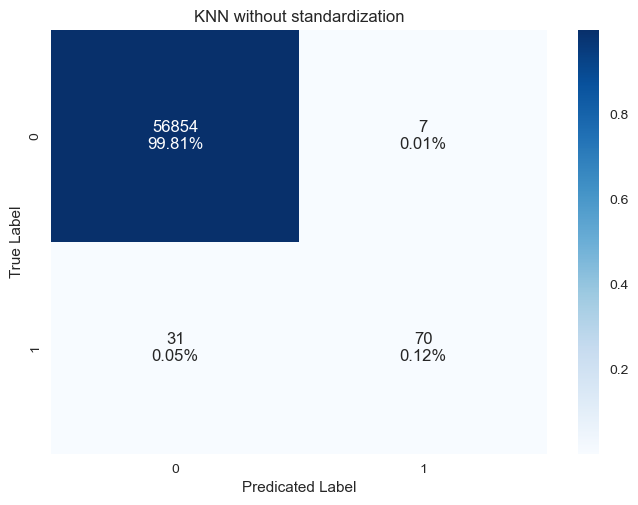

Accuracy (R^2) of Train Dataset:  0.9993855471921701
Accuracy (R^2) of Test Dataset:  0.9993328885923949
Accuracy score overall:  0.9993328885923949
Precision score overall:  0.9090909090909091
Recall score is 69.3069%


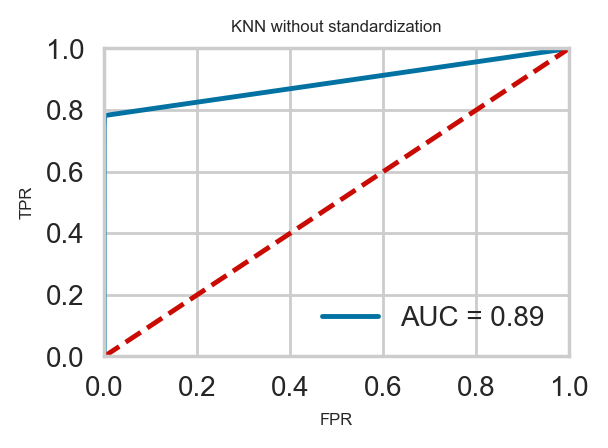

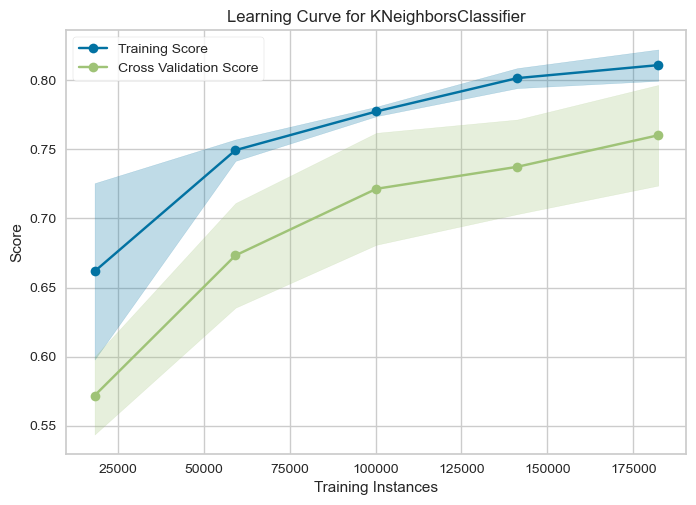

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [26]:
# Case 1: without standardization and without cv
y_pred, y_pred_proba, model = model_nosm(no_stand_X_features, knn, 'knn_nosd', 'KNN without standardization')
ROC(y_test, y_pred, y_pred_proba, 'knn_nosd', 'KNN without standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()    

KNN with standardization and without using smote
Classification accuracy is: 
 [[9.98121555e-01 1.05333380e-04]
 [3.68666831e-04 1.40444507e-03]]
Confusion Matrix is: 
 [[56855     6]
 [   21    80]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.79      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.8581534206276987


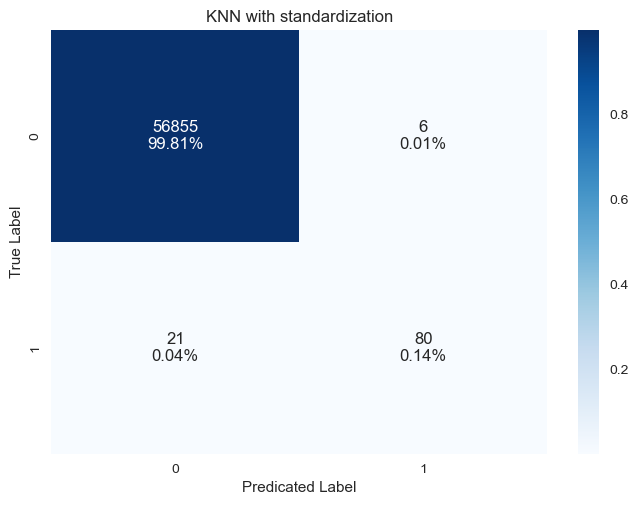

Accuracy (R^2) of Train Dataset:  0.9995918277776559
Accuracy (R^2) of Test Dataset:  0.9995259997893332
Accuracy score overall:  0.9995259997893332
Precision score overall:  0.9302325581395349
Recall score is 79.2079%


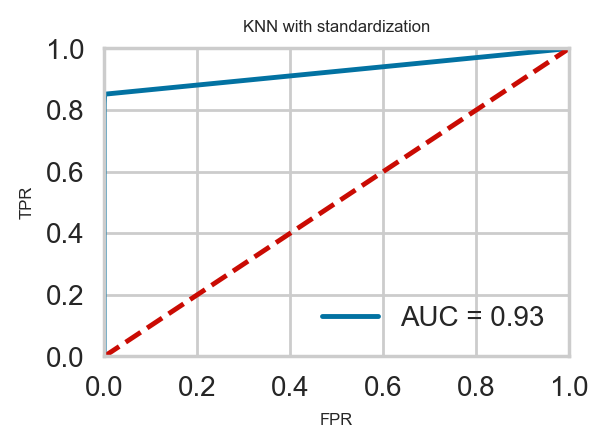

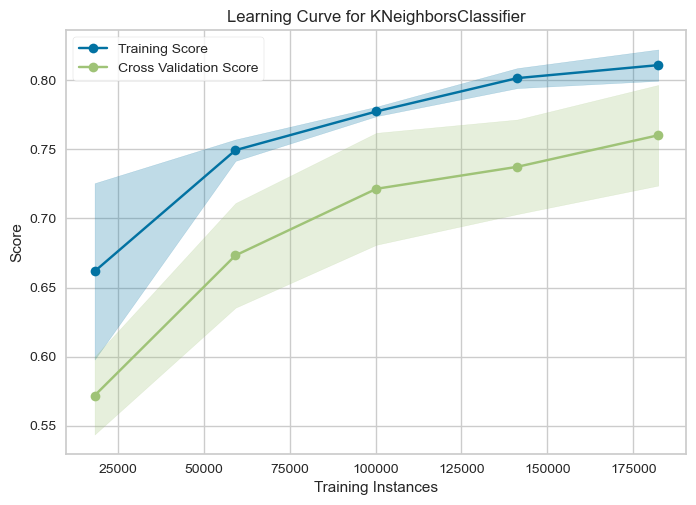

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [27]:
# Case 2: with standardization and without cv
y_pred, y_pred_proba, model = model_nosm(stand_X_features, knn, 'knn_sd', 'KNN with standardization')
ROC(y_test, y_pred, y_pred_proba, 'knn_sd', 'KNN with standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()    

### 3.6.3 Random Forest

In [28]:
rf = RandomForestClassifier(random_state=42)

Random Forest without standardization and without using smote
Classification accuracy is: 
 [[9.98121555e-01 1.05333380e-04]
 [3.86222394e-04 1.38688951e-03]]
Confusion Matrix is: 
 [[56855     6]
 [   22    79]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.78      0.85       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.8523878579438506


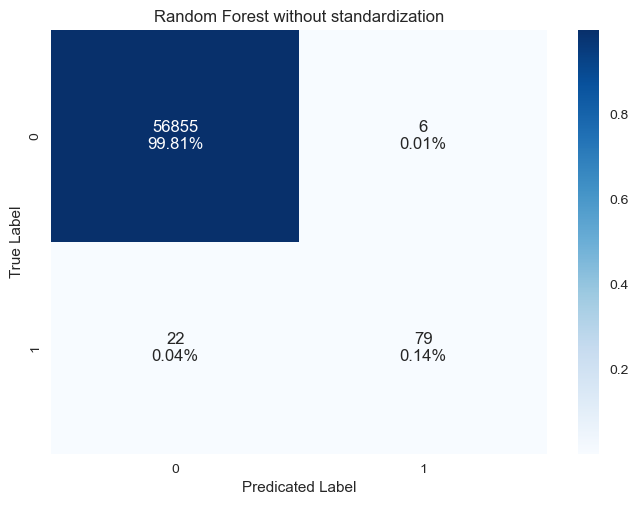

Accuracy (R^2) of Train Dataset:  0.9999956110513727
Accuracy (R^2) of Test Dataset:  0.9995084442259752
Accuracy score overall:  0.9995084442259752
Precision score overall:  0.9294117647058824
Recall score is 78.2178%


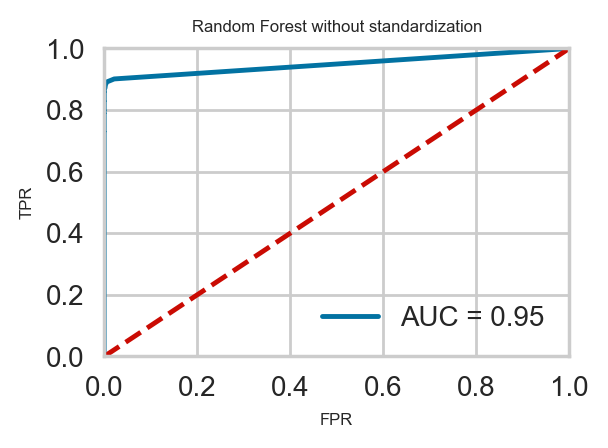

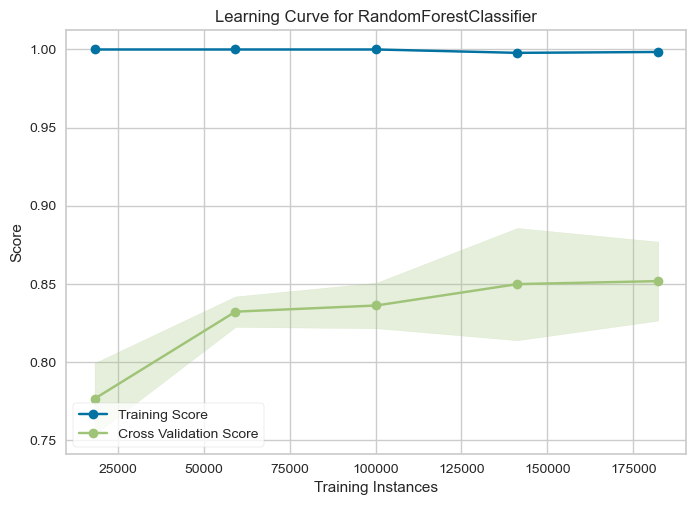

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [29]:
# Case 1: without standardization and without cv
y_pred, y_pred_proba, model = model_nosm(no_stand_X_features, rf, 'rf_nosd', 'Random Forest without standardization')
ROC(y_test, y_pred, y_pred_proba, 'rf_nosd', 'Random Forest without standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()    

Random Forest with standardization and without using smote
Classification accuracy is: 
 [[9.98121555e-01 1.05333380e-04]
 [3.86222394e-04 1.38688951e-03]]
Confusion Matrix is: 
 [[56855     6]
 [   22    79]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.78      0.85       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.8523878579438506


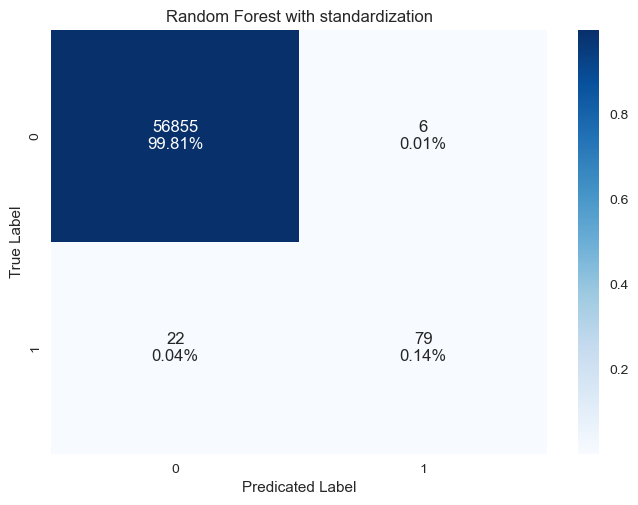

Accuracy (R^2) of Train Dataset:  0.9999956110513727
Accuracy (R^2) of Test Dataset:  0.9995084442259752
Accuracy score overall:  0.9995084442259752
Precision score overall:  0.9294117647058824
Recall score is 78.2178%


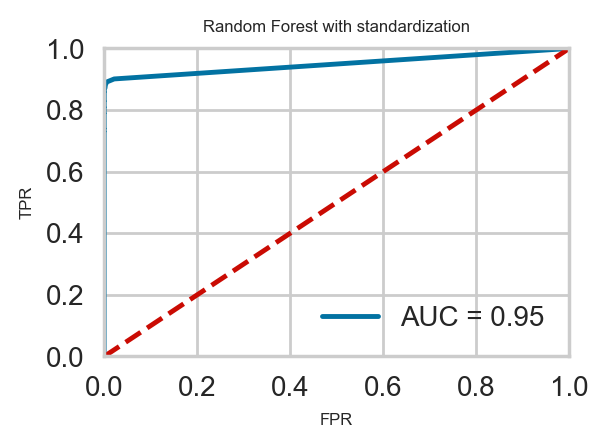

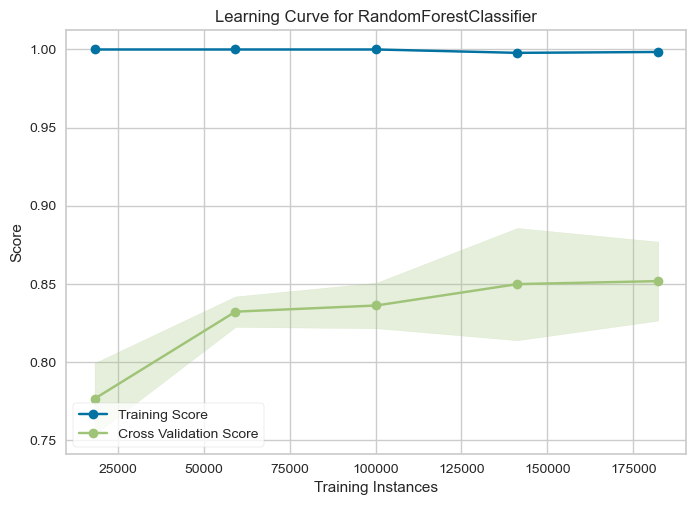

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [30]:
# Case 2: with standardization and without cv
y_pred, y_pred_proba, model = model_nosm(stand_X_features, rf, 'rf_sd', 'Random Forest with standardization')
ROC(y_test, y_pred, y_pred_proba, 'rf_sd', 'Random Forest with standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()    

### 3.6.4 Gradient Boosting Classifier

In [31]:
gbdt = GradientBoostingClassifier()

GBDT without standardization and without using smote
Classification accuracy is: 
 [[9.97893332e-01 3.33555704e-04]
 [4.91555774e-04 1.28155613e-03]]
Confusion Matrix is: 
 [[56842    19]
 [   28    73]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.79      0.72      0.76       101

    accuracy                           1.00     56962
   macro avg       0.90      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.756890518569283


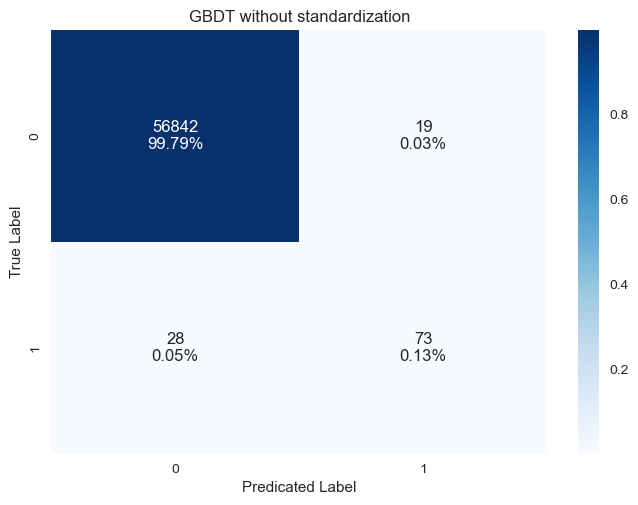

Accuracy (R^2) of Train Dataset:  0.9993460466545239
Accuracy (R^2) of Test Dataset:  0.9991748885221726
Accuracy score overall:  0.9991748885221726
Precision score overall:  0.7934782608695652
Recall score is 72.2772%


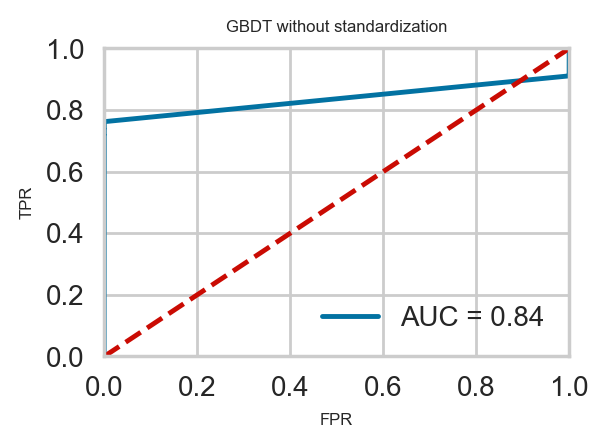

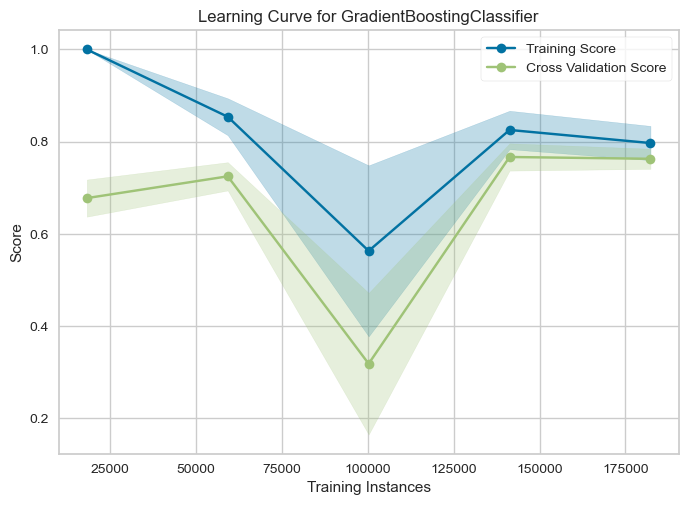

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [32]:
# Case 1: without standardization and without cv
y_pred, y_pred_proba, model = model_nosm(no_stand_X_features, gbdt, 'gbdt_nosd', 'GBDT without standardization')
ROC(y_test, y_pred, y_pred_proba, 'gbdt_nosd', 'GBDT without standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()    

GBDT with standardization and without using smote
Classification accuracy is: 
 [[9.98016221e-01 2.10666760e-04]
 [5.79333591e-04 1.19377831e-03]]
Confusion Matrix is: 
 [[56849    12]
 [   33    68]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.85      0.67      0.75       101

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.756113331713651


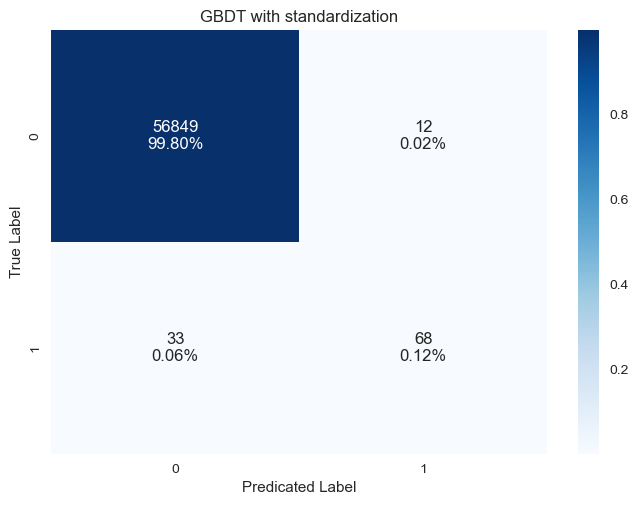

Accuracy (R^2) of Train Dataset:  0.9993899361407975
Accuracy (R^2) of Test Dataset:  0.9992099996488887
Accuracy score overall:  0.9992099996488887
Precision score overall:  0.85
Recall score is 67.3267%


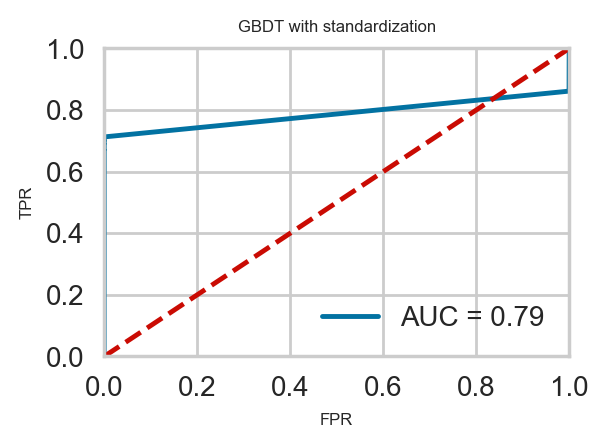

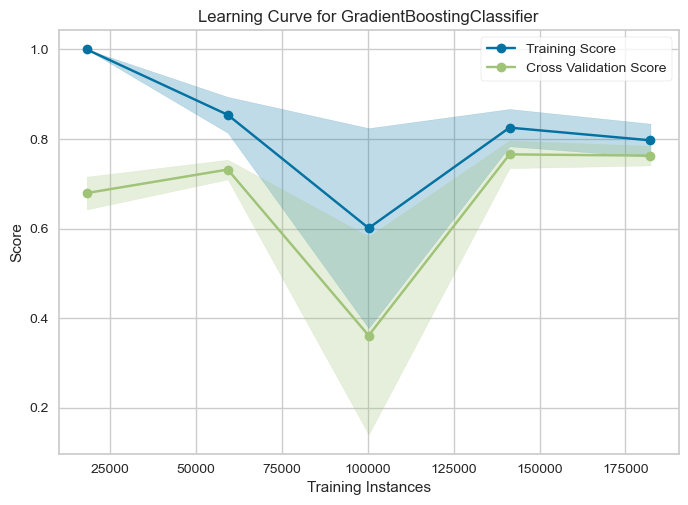

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [33]:
# Case 2: with standardization and without cv
y_pred, y_pred_proba, model = model_nosm(stand_X_features, gbdt, 'gbdt_sd', 'GBDT with standardization')
ROC(y_test, y_pred, y_pred_proba, 'gbdt_sd', 'GBDT with standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()    

## 3.7 With Oversampling 
### 3.7.1 Logistic Regression 

In [34]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)


Logistic Regression without standardization and with using smote
Classification accuracy is: 
 [[9.79863769e-01 1.83631193e-02]
 [1.40444507e-04 1.63266739e-03]]
Confusion Matrix is: 
 [[55815  1046]
 [    8    93]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.08      0.92      0.15       101

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962

MCC: 0.2712044501935392


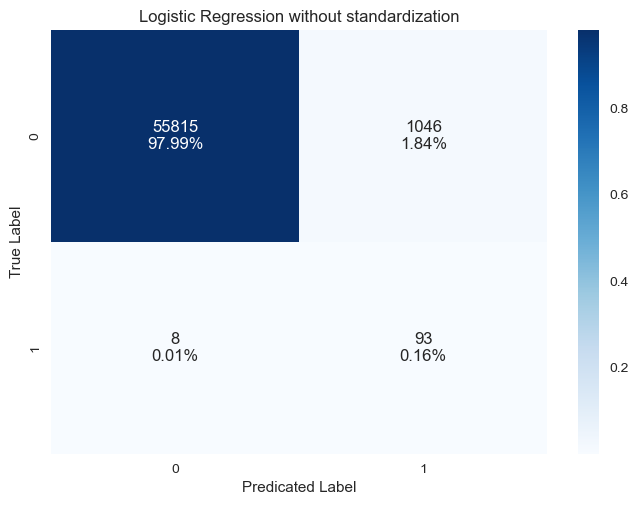

Accuracy (R^2) of Train Dataset:  0.9818209747854901
Accuracy (R^2) of Test Dataset:  0.9814964362206383
Accuracy Score overall: 0.9814964362206383
Precision score overall:  0.08165057067603161
Recall score is 92.0792%


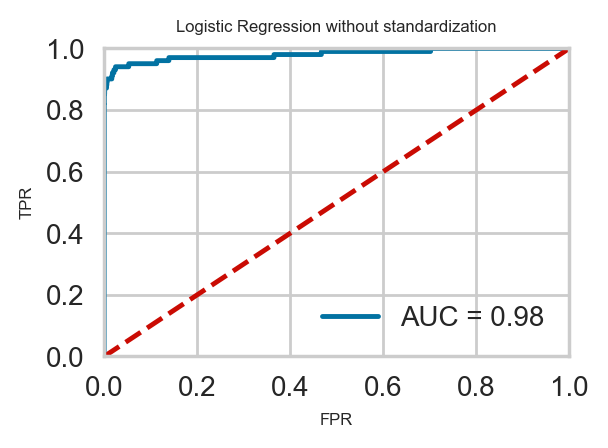

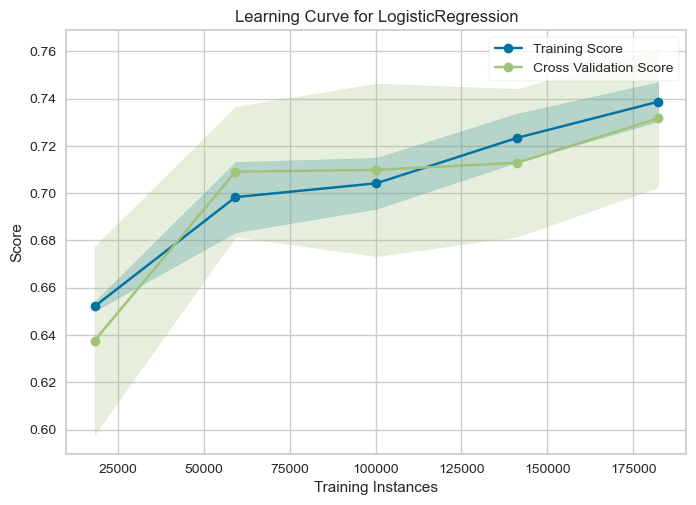

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [35]:
# Case 1: without standardization
y_pred_sm, y_pred_proba_sm, model = model_sm(no_stand_X_features, lr, 'lr_nosd_sm', 'Logistic Regression without standardization')
ROC(y_test, y_pred_sm, y_pred_proba_sm, 'lr_nosd_sm', 'Logistic Regression without standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()      


Logistic Regression with standardization and with using smote
Classification accuracy is: 
 [[9.73613988e-01 2.46128998e-02]
 [1.05333380e-04 1.66777852e-03]]
Confusion Matrix is: 
 [[55459  1402]
 [    6    95]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962

MCC: 0.24088698540320816


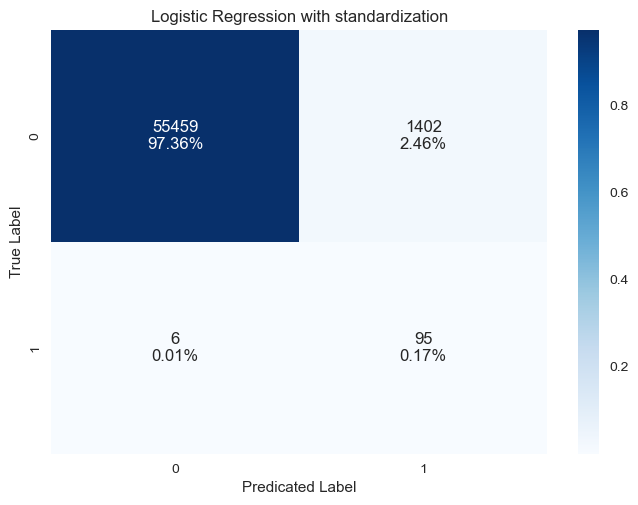

Accuracy (R^2) of Train Dataset:  0.9752243849985736
Accuracy (R^2) of Test Dataset:  0.9752817667918964
Accuracy Score overall: 0.9752817667918964
Precision score overall:  0.06346025384101536
Recall score is 94.0594%


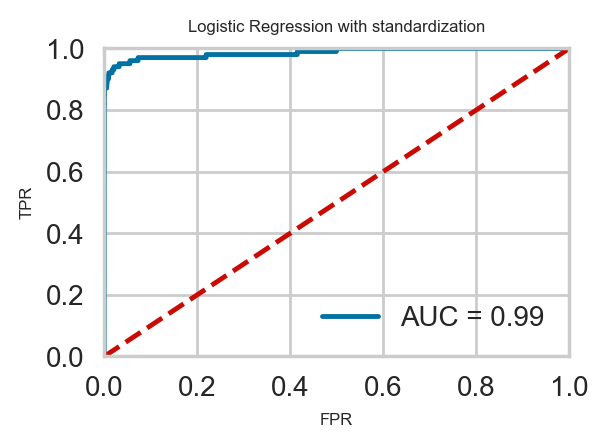

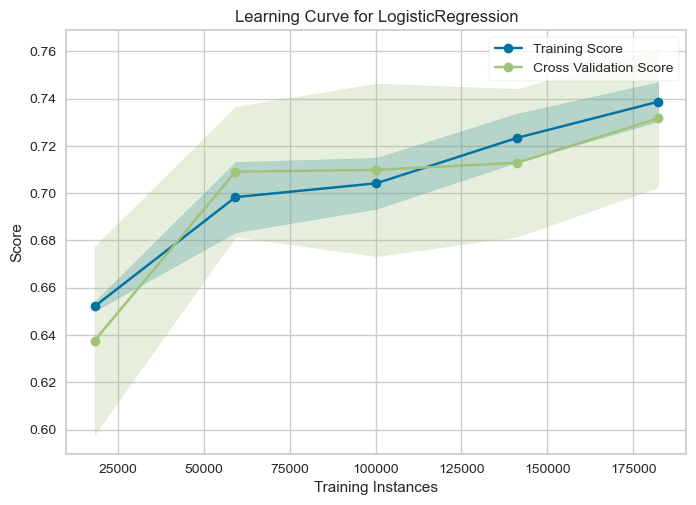

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [36]:
# Case 2: with standardization
lr2 = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
y_pred_sm, y_pred_proba_sm, model = model_sm(stand_X_features, lr2, 'lr_sd_sm', 'Logistic Regression with standardization')
ROC(y_test, y_pred_sm, y_pred_proba_sm, 'lr_sd_sm', 'Logistic Regression with standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

### 3.7.2 KNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=50)


KNN without standardization and with using smote
Classification accuracy is: 
 [[9.83585548e-01 1.46413398e-02]
 [1.93111197e-04 1.58000070e-03]]
Confusion Matrix is: 
 [[56027   834]
 [   11    90]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.10      0.89      0.18       101

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.99      0.99     56962

MCC: 0.2918796302001046


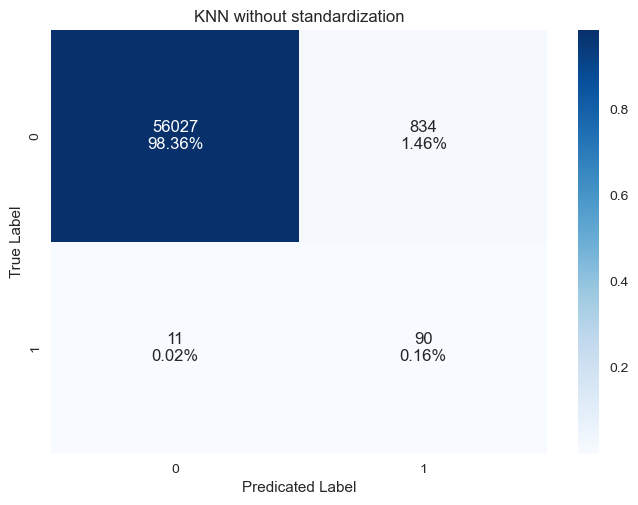

Accuracy (R^2) of Train Dataset:  0.9857095832693278
Accuracy (R^2) of Test Dataset:  0.9851655489624662
Accuracy Score overall: 0.9851655489624662
Precision score overall:  0.09740259740259741
Recall score is 89.1089%


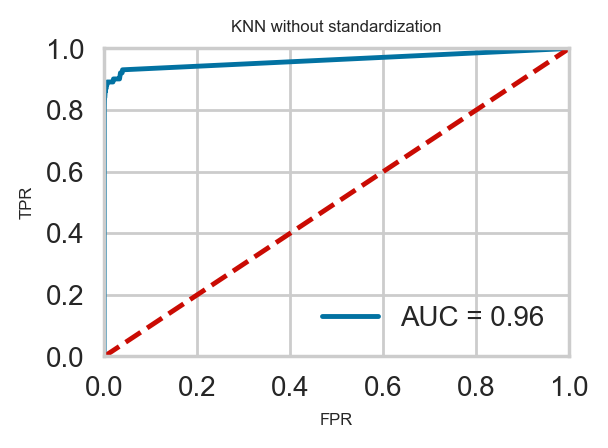

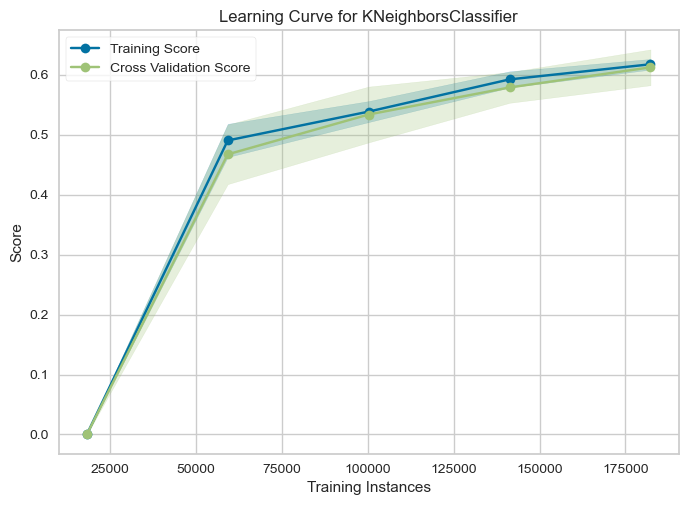

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [38]:
# Case 1: without standardization
y_pred_sm, y_pred_proba_sm, model = model_sm(no_stand_X_features, knn, 'knn_nosd_sm', 'KNN without standardization')
ROC(y_test, y_pred_sm, y_pred_proba_sm, 'knn_nosd_sm', 'KNN without standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   


KNN with standardization and with using smote
Classification accuracy is: 
 [[9.87763772e-01 1.04631158e-02]
 [1.93111197e-04 1.58000070e-03]]
Confusion Matrix is: 
 [[56265   596]
 [   11    90]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.13      0.89      0.23       101

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

MCC: 0.3396460746425614


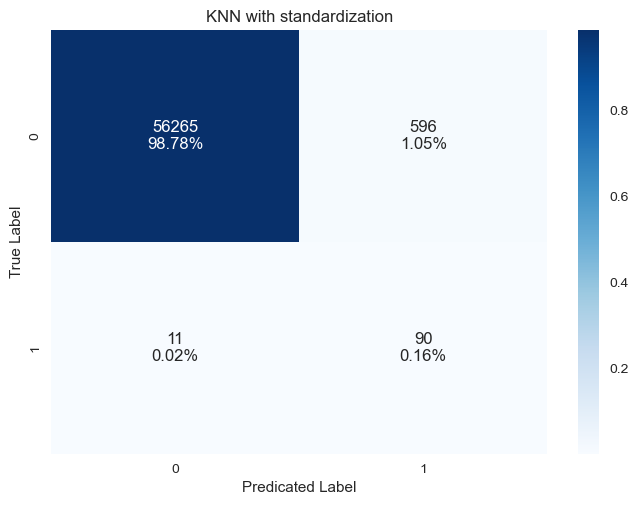

Accuracy (R^2) of Train Dataset:  0.9891461300445479
Accuracy (R^2) of Test Dataset:  0.9893437730416769
Accuracy Score overall: 0.9893437730416769
Precision score overall:  0.13119533527696792
Recall score is 89.1089%


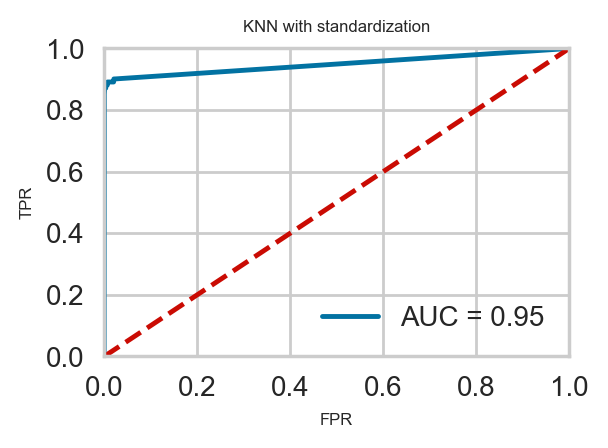

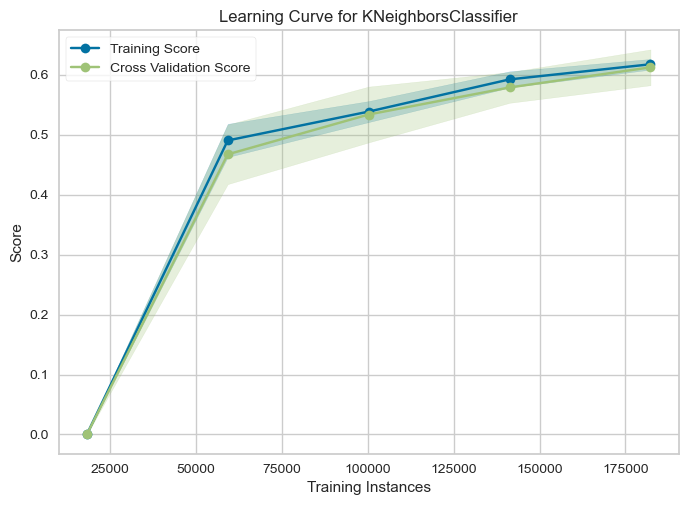

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [39]:
# Case 2: with standardization
y_pred_sm, y_pred_proba_sm, model = model_sm(stand_X_features, knn, 'knn_sd_sm', 'KNN with standardization')
ROC(y_test, y_pred_sm, y_pred_proba_sm, 'knn_sd_sm', 'KNN with standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

### 3.7.3 Random Forest

In [40]:
rf = RandomForestClassifier(random_state=42)


Random Forest without standardization and with using smote
Classification accuracy is: 
 [[9.97981110e-01 2.45777887e-04]
 [2.45777887e-04 1.52733401e-03]]
Confusion Matrix is: 
 [[56847    14]
 [   14    87]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.86      0.86      0.86       101

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.861139924161073


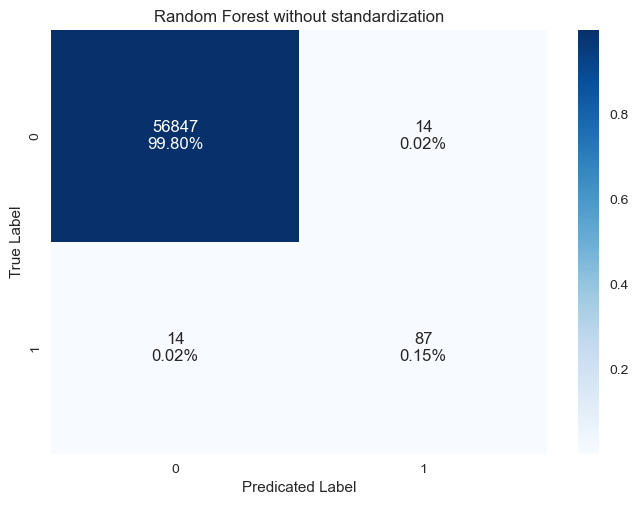

Accuracy (R^2) of Train Dataset:  1.0
Accuracy (R^2) of Test Dataset:  0.9995084442259752
Accuracy Score overall: 0.9995084442259752
Precision score overall:  0.8613861386138614
Recall score is 86.1386%


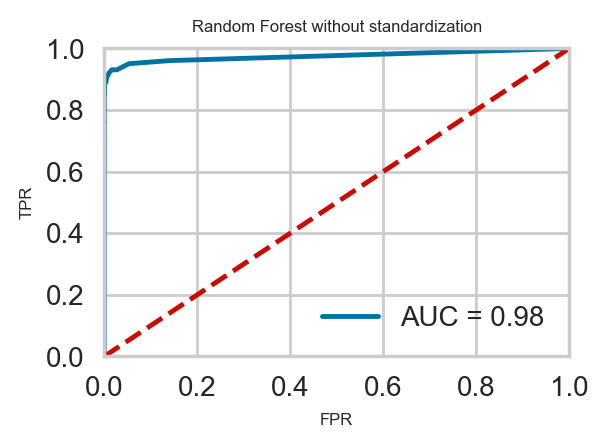

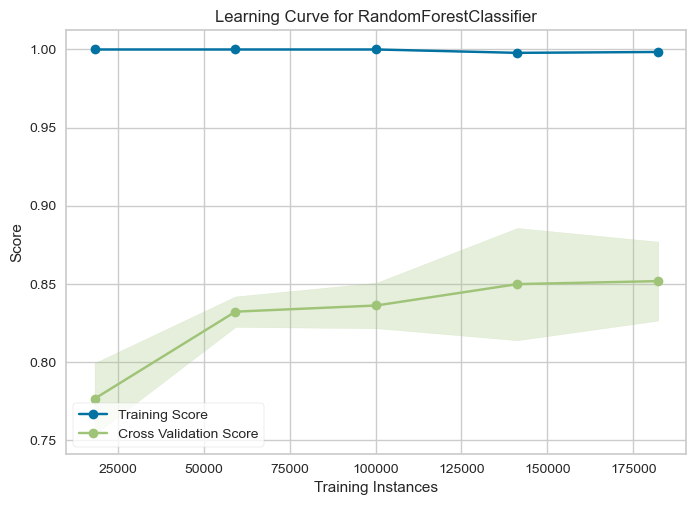

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [41]:
# Case 1: without standardization
y_pred_sm, y_pred_proba_sm, model = model_sm(no_stand_X_features, rf, 'rf_nosd_sm', 'Random Forest without standardization')
ROC(y_test, y_pred_sm, y_pred_proba_sm, 'rf_nosd_sm', 'Random Forest without standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   


Random Forest with standardization and with using smote
Classification accuracy is: 
 [[9.97998666e-01 2.28222324e-04]
 [2.63333450e-04 1.50977845e-03]]
Confusion Matrix is: 
 [[56848    13]
 [   15    86]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.87      0.85      0.86       101

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.8597969567972135


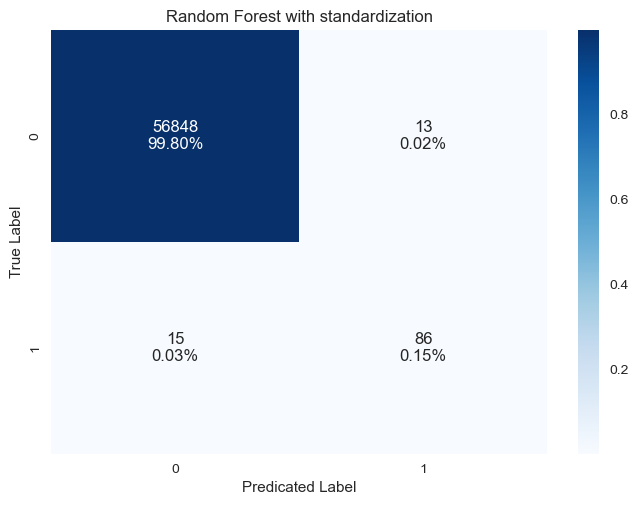

Accuracy (R^2) of Train Dataset:  1.0
Accuracy (R^2) of Test Dataset:  0.9995084442259752
Accuracy Score overall: 0.9995084442259752
Precision score overall:  0.8686868686868687
Recall score is 85.1485%


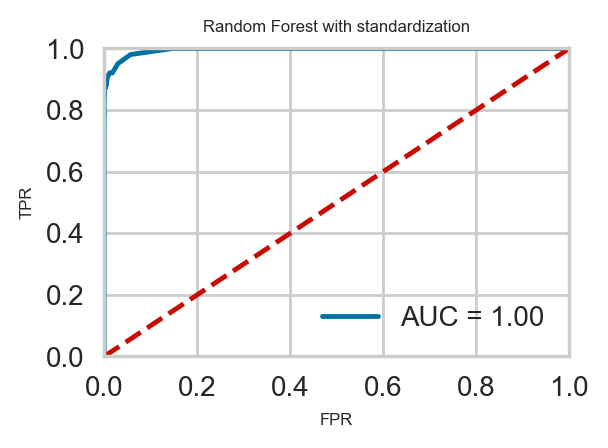

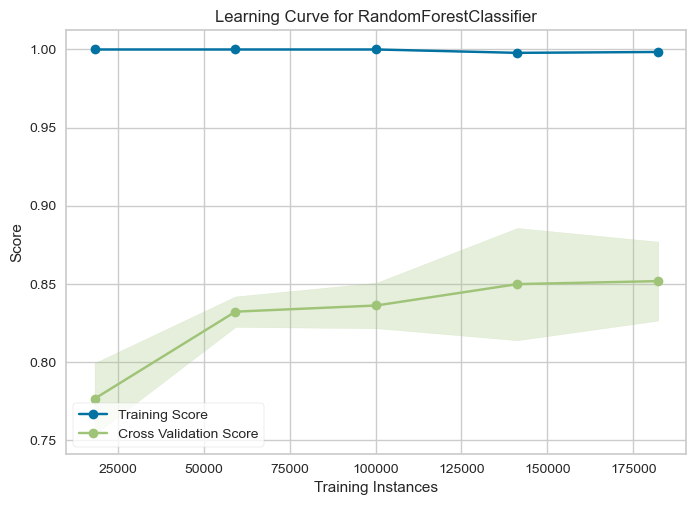

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [42]:
# Case 2: with standardization
y_pred_sm, y_pred_proba_sm, model = model_sm(stand_X_features, rf, 'rf_sd_sm', 'Random Forest with standardization')
ROC(y_test, y_pred_sm, y_pred_proba_sm, 'rf_sd_sm', 'Random Forest with standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

### 3.7.4 Gradient Boosting Classifier

In [43]:
gbdt = GradientBoostingClassifier()


GBDT without standardization and with using smote
Classification accuracy is: 
 [[9.89782662e-01 8.44422598e-03]
 [1.93111197e-04 1.58000070e-03]]
Confusion Matrix is: 
 [[56380   481]
 [   11    90]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.16      0.89      0.27       101

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962

MCC: 0.37275511264710603


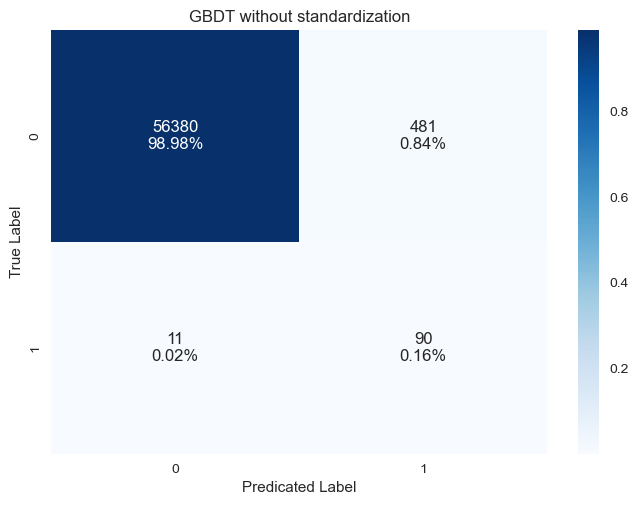

Accuracy (R^2) of Train Dataset:  0.9914239943821458
Accuracy (R^2) of Test Dataset:  0.9913626628278501
Accuracy Score overall: 0.9913626628278501
Precision score overall:  0.15761821366024517
Recall score is 89.1089%


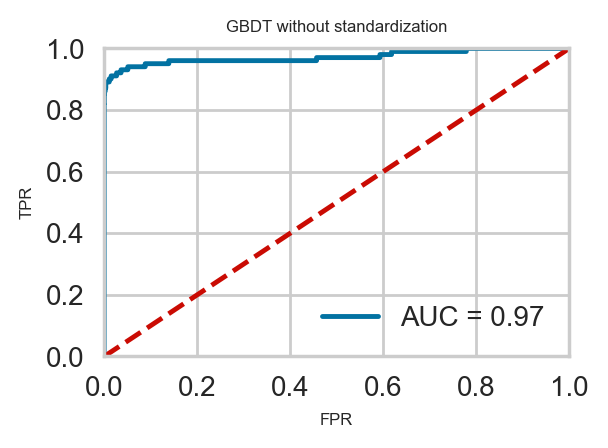

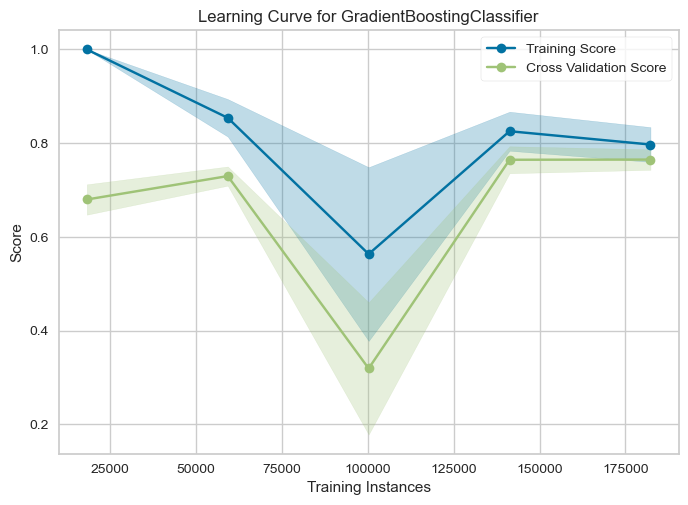

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [44]:
# Case 1: without standardization
y_pred_sm, y_pred_proba_sm, model = model_sm(no_stand_X_features, gbdt, 'gbdt_nosd_sm', 'GBDT without standardization')
ROC(y_test, y_pred_sm, y_pred_proba_sm, 'gbdt_nosd_sm', 'GBDT without standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   


GBDT with standardization and with using smote
Classification accuracy is: 
 [[9.86657772e-01 1.15691163e-02]
 [1.75555634e-04 1.59755627e-03]]
Confusion Matrix is: 
 [[56202   659]
 [   10    91]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.12      0.90      0.21       101

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962

MCC: 0.32826162840211714


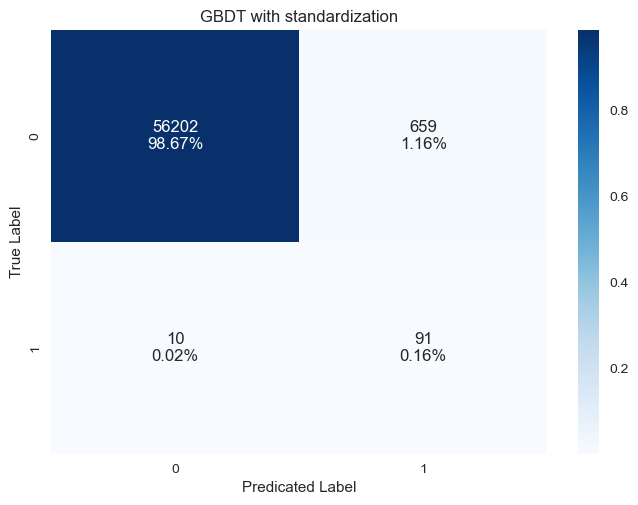

Accuracy (R^2) of Train Dataset:  0.9880620597335908
Accuracy (R^2) of Test Dataset:  0.9882553281134792
Accuracy Score overall: 0.9882553281134792
Precision score overall:  0.12133333333333333
Recall score is 90.099%


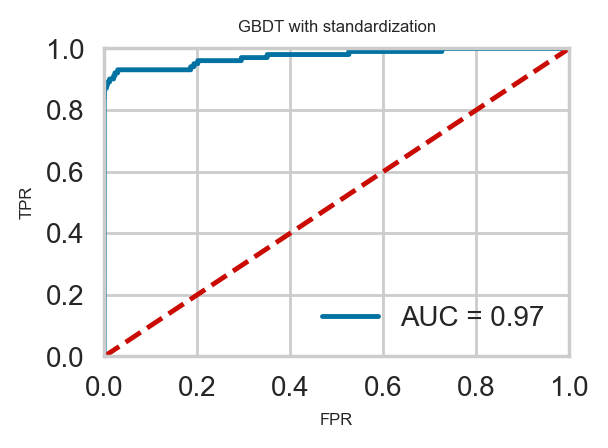

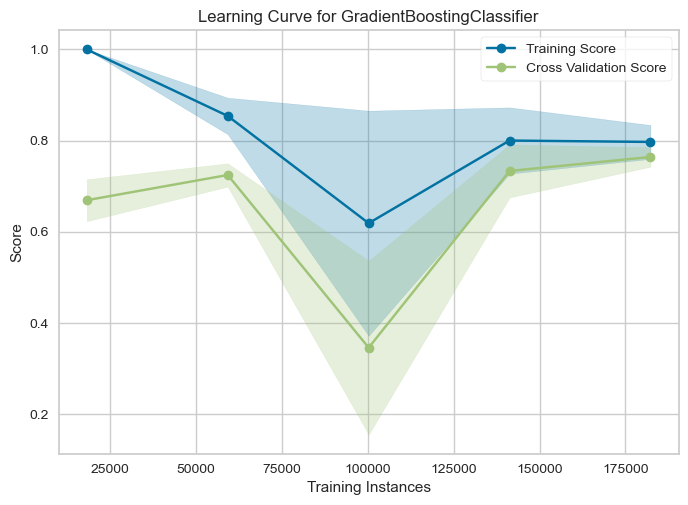

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [45]:
# Case 2: with standardization
y_pred_sm, y_pred_proba_sm, model = model_sm(stand_X_features, gbdt, 'gbdt_sd_sm', 'GBDT with standardization')
ROC(y_test, y_pred_sm, y_pred_proba_sm, 'gbdt_sd_sm', 'GBDT with standardization')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

## 3.8 Standardization With GridSerchCV
From the above results, it can be found that the prediction model performs better after standardization. Hence, GridSearchCV with standardized dataset will be used to explore whether the model can be improved by oversampling method - smote.

* GridSearchCV Without SMOTE

In [23]:
def gridCV_nosm(features, params, model):
    stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=11)
    model_cv = GridSearchCV(model, param_grid=params, scoring=make_scorer(metrics.matthews_corrcoef), cv=stratified_kfold, n_jobs=-1)
    model_cv.fit(X_train[features], y_train)
    
    return model_cv.best_params_

* GridSearchCV With SMOTE

In [24]:
def gridCV_sm(features, params, model):
    pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                    ['classifier', model]])
    stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=11)
    grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=params,
                           scoring=make_scorer(metrics.matthews_corrcoef),
                           cv=stratified_kfold,
                           n_jobs=-1)
    grid_search.fit(X_train[features], y_train)
    return grid_search.best_params_

### 3.8.1 Logistic Regression

In [48]:
# Case 1: GridSearchCV without oversampling 
lr_cv = LogisticRegression(max_iter=1000, random_state=42)
params = {"C":[0.01, 0.1, 1, 10, 100], "penalty":["l1", "l2"]}
best_params = gridCV_nosm(stand_X_features, params, lr_cv)
best_params

{'C': 1, 'penalty': 'l2'}

Logistic Regression with standardization and CV and without using smote
Classification accuracy is: 
 [[9.98068888e-01 1.58000070e-04]
 [6.49555844e-04 1.12355605e-03]]
Confusion Matrix is: 
 [[56852     9]
 [   37    64]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

MCC: 0.7449763042763461


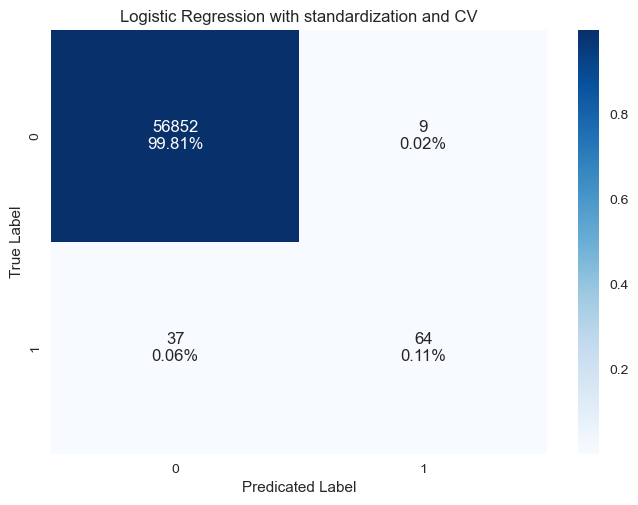

Accuracy (R^2) of Train Dataset:  0.999188044503939
Accuracy (R^2) of Test Dataset:  0.9991924440855307
Accuracy score overall:  0.9991924440855307
Precision score overall:  0.8767123287671232
Recall score is 63.3663%


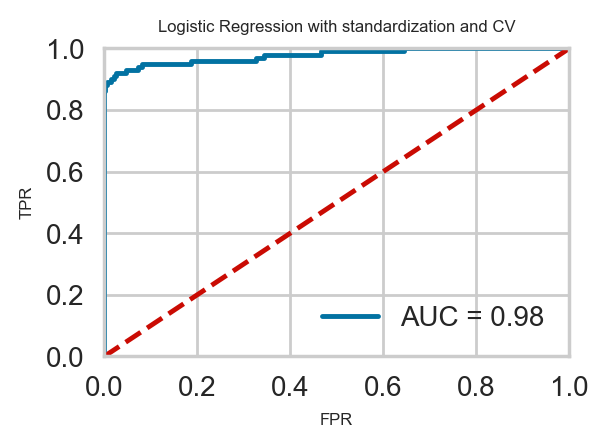

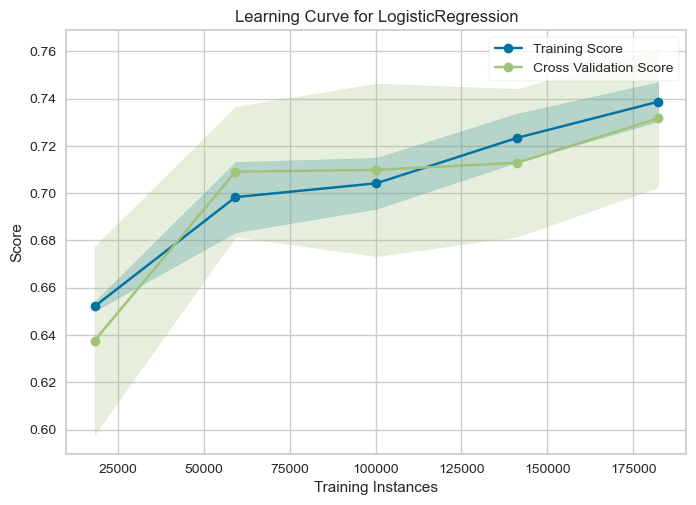

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [49]:
best_lr = LogisticRegression(max_iter=1000, random_state=42, C=1, penalty='l2')
y_pred, y_pred_proba, model = model_nosm(stand_X_features, best_lr, 'lr_sd_cv', 'Logistic Regression with standardization and CV')
ROC(y_test, y_pred, y_pred_proba, 'lr_sd_cv', 'Logistic Regression with standardization and CV')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

In [50]:
# Case 2: GridSearchCV with oversampling 
lr_cv_sm = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__penalty': ["l1", "l2"]}
best_params_cv = gridCV_sm(stand_X_features, param_grid, lr_cv_sm)
best_params_cv

{'classifier__C': 0.01, 'classifier__penalty': 'l2'}


Logistic Regression with standardization and CV and with using smote
Classification accuracy is: 
 [[9.74123100e-01 2.41037885e-02]
 [1.05333380e-04 1.66777852e-03]]
Confusion Matrix is: 
 [[55488  1373]
 [    6    95]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962

MCC: 0.24332652893259815


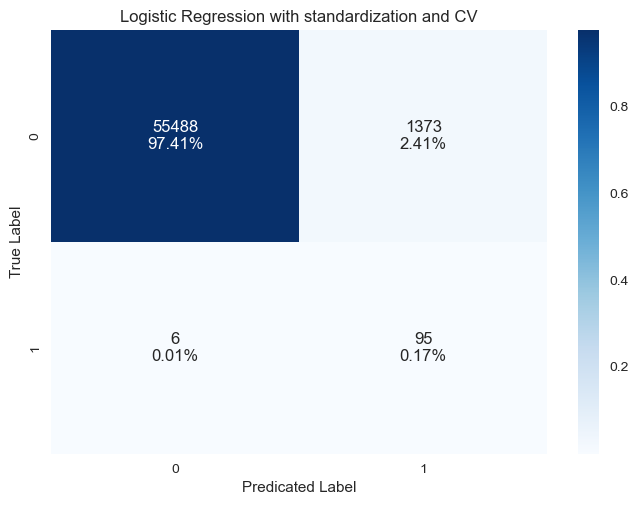

Accuracy (R^2) of Train Dataset:  0.975685224604446
Accuracy (R^2) of Test Dataset:  0.9757908781292791
Accuracy Score overall: 0.9757908781292791
Precision score overall:  0.06471389645776567
Recall score is 94.0594%


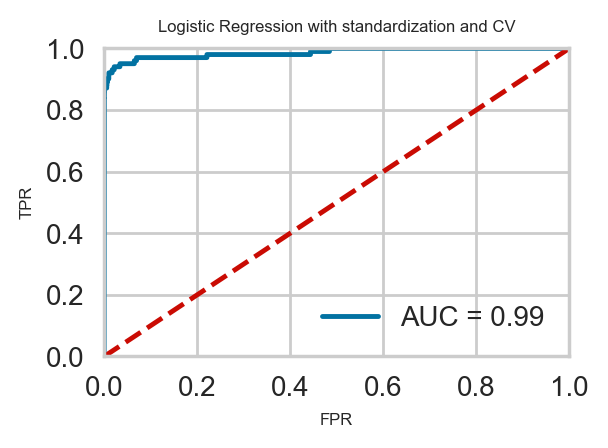

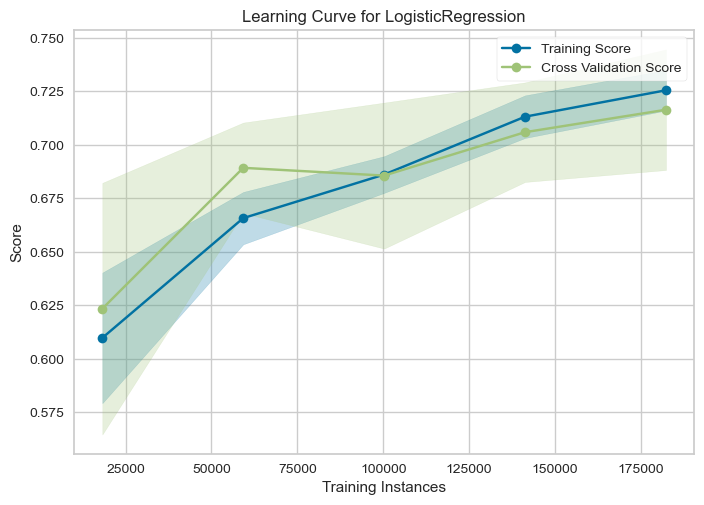

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [51]:
best_lr_cv = LogisticRegression(max_iter=1000, random_state=42, C=0.01, penalty='l2')
y_pred_sm_cv, y_pred_proba_sm_cv, model = model_sm(stand_X_features, best_lr_cv, 'lr_sd_sm_cv', 'Logistic Regression with standardization and CV')
ROC(y_test, y_pred_sm_cv, y_pred_proba_sm_cv, 'lr_sd_sm_cv', 'Logistic Regression with standardization and CV')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

### 3.8.2 KNN

In [ ]:
# Case 1: GridSearchCV without oversampling 
knn_cv = KNeighborsClassifier()
param_grid = {'n_neighbors': range(3, 10)}
best_params = gridCV_nosm(stand_X_features, param_grid, knn_cv)
best_params

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=3)
y_pred, y_pred_proba, model = model_nosm(stand_X_features, best_knn, 'knn_sd_cv', 'KNN with standardization and CV')
ROC(y_test, y_pred, y_pred_proba, 'knn_sd_cv', 'KNN with standardization and CV')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

In [ ]:
# Case 2: GridSearchCV with oversampling 
knn_cv_sm = KNeighborsClassifier()
best_params_cv = gridCV_sm(stand_X_features, param_grid, knn_cv_sm)
best_params_cv

In [ ]:
best_knn_cv = KNeighborsClassifier(n_neighbors=3)
y_pred_sm_cv, y_pred_proba_sm_cv, model = model_sm(stand_X_features, best_knn_cv, 'knn_sd_sm_cv', 'KNN with standardization and CV')
ROC(y_test, y_pred_sm_cv, y_pred_proba_sm_cv, 'knn_sd_sm_cv', 'KNN with standardization and CV')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

### 3.8.3 Random Forest

In [ ]:
# Case 1: GridSearchCV without oversampling 
rf_cv = RandomForestClassifier(random_state=42)
param_grid = [{'max_depth': [10,11]), 'max_features': [8,9]}]

best_params = gridCV_nosm(stand_X_features, param_grid, rf_cv)
best_params

In [ ]:
best_rf = RandomForestClassifier(max_depth=10,  max_features=9, random_state=42)
y_pred, y_pred_proba, model = model_nosm(stand_X_features, best_rf, 'rf_sd_cv', 'Random Forest with standardization and CV')
ROC(y_test, y_pred, y_pred_proba, 'rf_sd_cv', 'Random Forest with standardization and CV')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

In [ ]:
# Case 2: GridSearchCV with oversampling 
rf_cv_sm = RandomForestClassifier(random_state=42)
best_params_cv = gridCV_sm(stand_X_features, param_grid, rf_cv_sm)
best_params_cv

In [ ]:
best_rf_cv = RandomForestClassifier(max_depth=,  max_features=, random_state=42)
y_pred_sm_cv, y_pred_proba_sm_cv, model = model_sm(stand_X_features, best_rf_cv, 'rf_sd_sm_cv', 'Random Forest with standardization and CV')
ROC(y_test, y_pred_sm_cv, y_pred_proba_sm_cv, 'rf_sd_sm_cv', 'Random Forest with standardization and CV')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

### 3.8.4 Gradient Boosting Classifier

In [ ]:
# Case 1: GridSearchCV without oversampling 
gbdt_cv = GradientBoostingClassifier(n_estimators=1000, random_state=42)
param_grid = {'learning_rate': [0.1, 1], 'max_leaf_nodes': [3, 10]}

best_params = gridCV_nosm(stand_X_features, param_grid, gbdt_cv)
best_params

In [ ]:
best_gbdt = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=42)
y_pred, y_pred_proba, model = model_nosm(stand_X_features, best_gbdt, 'gbdt_sd_cv', 'GBDT with standardization and CV')
ROC(y_test, y_pred, y_pred_proba, 'gbdt_sd_cv', 'GBDT with standardization and CV')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   

In [ ]:
# Case 2: GridSearchCV with oversampling 
gbdt_cv_sm = GradientBoostingClassifier(n_estimators=1000, random_state=42)
best_params_cv = gridCV_sm(stand_X_features, param_grid, gbdt_cv_sm)
best_params_cv

In [ ]:
best_gbdt_cv = GradientBoostingClassifier(n_estimators=1000, learning_rate=1, max_depth=10, random_state=42)
y_pred_sm_cv, y_pred_proba_sm_cv, model = model_sm(stand_X_features, best_gbdt_cv, 'gbdt_sd_sm_cv', 'GBDT with standardization and CV')
ROC(y_test, y_pred_sm_cv, y_pred_proba_sm_cv, 'gbdt_sd_sm_cv', 'GBDT with standardization and CV')
visualizer = LearningCurve(model, scoring=make_scorer(metrics.matthews_corrcoef))
visualizer.fit(X_train, y_train)       
visualizer.show()   